# Machine Learning Engineer Nanodegree
# Capstone Proposal

Khalil Zouhar, September 04, 2023


## Proposal

The project is a newly added Kaggle competition: Predict House sales prices.

[Competition details available Here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

### Domain Background

House Price Prediction:

An accurate prediction on the house price is important to prospective homeowners,
developers, investors, appraisers, tax assessors and other real estate market stakeholders, such
as, mortgage lenders and insurers. 
There is no standard certified way to assess the price of house. Therefore, the availability of a house price prediction model using machine learning can help fill up an
important information gap and improve the efficiency of the real estate market 

While the house price data at hand refers the region of Ames, Iowa, the techniques used in price housing prediction like data preparation, feature engineering could be similar using data from different 
similar initiatives around the world. This is true since we are trying to solve similar problem in different part of the world.
I attend to leverage feature engineering techniques mentioned in different research articles worldwide.
House classification description may slightly change from one area but the human behavior to prefer 1 house over another one will be similar (ie: house size or neighbourhood will influence the price in similar ways worldwide )

It is worthy to highlight that the scope  of this project is to develop a prediction tool to be used in the region of Ames, Iowa.
The years it covers are from 2010 to 2016. Outside the house features, other attributes may affect the price of house like the economical condition, inflation..etc. 
Those attributes may change year over year, building a model that take into account those attributes is out of scope for this project.
Using the same model to predict the house price in other areas or recent years (ie: 2023) may not lead to a good prediction without training the model with up-to-date data.

To keep the model up to date a pipeline could be build that continuously retrain the model with current data for better prediction.
I also can forecast that with proper data and proper transformation (may be using spark) and feature engineering the same piepline can digest housing data from different parts of the world and
expose and api that can predict a House price worldwide. This is of course out of scope for this project.

I intend to use the following articles and leverage proven techniques of feature engineering for better quality of the models.

#### References:

- [Housing Price Prediction via Improved Machine Learning Techniques] (https://www.sciencedirect.com/science/article/pii/S1877050920316318)
- [House Price Prediction using a Machine Learning Model: A Survey of Literature] (https://www.researchgate.net/publication/347584803_House_Price_Prediction_using_a_Machine_Learning_Model_A_Survey_of_Literature)
- [Prediction and Analysis of Housing Price Based on the Generalized Linear Regression Model] (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9536958/)

### Problem Statement

#### Stakeholders: 
prospective homeowners,
developers, investors, appraisers, tax assessors and other real estate market stakeholders, such
as, mortgage lenders and insurers would like to predict house price.

#### Domain:
Real State Business, Banking Business, Insurance Business

#### Problem:
How to efficiently predict a house price?. There is an information gap when it came to house prediction. The information gap can be filled with using 
Machine learning techniques, thus driving real eastate efficiency.

### Datasets and Inputs

The dataset has records of 1460 house sold between 2010 and 2016 in Ames, Iowa. Each data record captures a list of 79 house features (ie: size, location) and the correspinding sale price.
House features are described in a separate file: data_description.txt

The dataset were compiled by Dean De Cok and collect the house sales in the area of Ames, Iowa.

The Data is available at: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

### Solution Statement

The goal here is to build a system that can predict a price of a given house based on house features. 
The data we have is a tabular data and the first solution that came ot mind is to use Decision trees.

Also, In this scenario, we are being asked to predict a numerical outcome. As result this is regression task.

Therefor this problem can be approached with tree machine learning models: Decision tree, random forest and gradient boosting machines.

I plan to use the decision tree as my baseline model then built on this experience to tune my candidate models.

Decision trees are easy to train and can give an insight on how to tune the hyperparameters.

For execution, I plan to use Jupyter Notebook in AWS environment.

Also, the following libraries will be used to
Pandas — For handling structured data
Scikit Learn — For machine learning
NumPy — For linear algebra and mathematics
Seaborn — For data visualization

In addition to the libraries, I plan also to use aws autogluon to help tune the hyperparameters.

### Benchmark Model

I will use the Kaggle leaderboard, in which the solutions are evaluated upon test data not made available to the competitors. In the leaderboard we can benchmark my results against solutions from other competitors.

for more details see sections **Machine Learning Model Selection** and **Model Evaluation and Benchmarking** below

### Evaluation Metrics

The evaluation metric is already defined by the competition to be Root-Mean-Squared-Error (RMSE).

The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSD represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences.

https://en.wikipedia.org/wiki/Root-mean-square_deviation

for more details see sections **Machine Learning Model Selection** and **Model Evaluation and Benchmarking** below


# Getting Started

n this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Ames, Iowa. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [Kaggle House Price Precition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). The dataset has records of 1460 house sold between 2010 and 2016 in Ames, Iowa. Each data record captures a list of 79 house features (ie: size, location) and the corresponding sale price.

House features are described in a separate file: data_description.txt

The dataset were compiled by Dean De Cok and collect the house sales in the area of Ames, Iowa.

Run the following cell to load the data set:

In [1]:
import numpy as np
import pandas as pd


# read in test and train data

train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
print("Ames housing dataset has {} data points with {} variables each.".format(*train_df.shape))



Ames housing dataset has 1460 data points with 81 variables each.


Duplicates are removed

In [2]:
train_df.duplicated(subset=None, keep="first")
test_df.duplicated(subset=None, keep="first")
print("Test", test_df.shape, "Train", train_df.shape)


Test (1459, 80) Train (1460, 81)


# Data Exploration

They are 81 features describing each sales transaction in Alem, IOWA. The first step in the process to analyze the features and get a first glimpse of which feature/data is relevant to the prediction. I decided to follow the 'divide to conquer' approach by grouping the features in different following categories that known to be the areas of interest when a customer is shopping for the dream house.

I defined the following main categories:

* Kitchen features:
* Basement Features: "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF"and  "TotalBsmtSF"
* Garage Features:
"GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"
* Porch Features: "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"
* External Features: Exterior1st, Exterior2nd, RoofMatl, RoofStyle, MasVnrArea, ExterQual, ExterCond, Foundation
* Size features:
* Quality Features: OverallQual, OverallCond
* House Type Features: "BldgType", "HouseStyle"
* House Location Features:

I will then analyze each feature within each category and find opportunities:

* To delete the feature if doesn't add a significant value in the house price prediction.
* Transform numerical features to categorial features when they don't describe a magnitude.
* Transform categorial features to ordinal features when they describe a magnitude (i.e.: Excellent, Very Good, Good...e).
* Transform categorial feature to One Hot encoded feature when possible.
* Suppress duplicated features or features that are strongly correlated with each other to avoid duplication and redundancy and supress features that has very low variance.


In [3]:
# TODO: Minimum price of the data
minimum_price = train_df["SalePrice"].min()

# TODO: Maximum price of the data
maximum_price = train_df["SalePrice"].max()

# TODO: Mean price of the data
mean_price = train_df["SalePrice"].mean()

# TODO: Median price of the data
median_price = train_df["SalePrice"].median()

# TODO: Standard deviation of prices of the data
std_price = train_df["SalePrice"].std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $34900
Maximum price: $755000
Mean price: $180921.19589041095
Median price $163000.0
Standard deviation of prices: $79442.50288288662


## Feature Observation

They are 81 features describing each sales transaction in Alem, IOWA. The first step in the process to analyze the features and get a first glimpse of which feature/data is relevant to the prediction. I decided to follow the 'divide to conquer' approach by grouping the features in different following categories that known to be the areas of interest when a customer is shopping for the dream house.

I defined the following main categories:

* Kitchen features:
* Basement Features: "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF"and  "TotalBsmtSF"
* Garage Features:
"GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"
* Porch Features: "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"
* External Features: Exterior1st, Exterior2nd, RoofMatl, RoofStyle, MasVnrArea, ExterQual, ExterCond, Foundation
* Size features:
* Quality Features: OverallQual, OverallCond
* House Type Features: "BldgType", "HouseStyle"
* House Location Features

I will then analyze each feature within each category and find opportunities:

* To delete the feature if doesn't add a significant value in the house price prediction.
* Transform numerical features to categorial features when they don't describe a magnitude.
* Transform categorial features to ordinal features when they describe a magnitude (i.e.: Excellent, Very Good, Good...e).
* Transform categorial feature to One Hot encoded feature when possible.
* Suppress duplicated features or features that are strongly correlated with each other to avoid duplication and redundancy and supress features that has very low variance.



Let's examine the data type of each feature:

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now Let's categorize and analyze each feature

In [5]:
train_df.duplicated(subset=None, keep="first")
test_df.duplicated(subset=None, keep="first")
print("Test", test_df.shape, "Train", train_df.shape)

Test (1459, 80) Train (1460, 81)


## Data Preprocessing


### Categorical features marked as NA

Some categorical features are marked as NA when the feature of the house is non-existant.
All those should be identified and replaced with something more descriptive.
Numerical categorical features that are marked as NA will be replaced with 0.

### Categorical features reflecting a magnitude

The following features denotes a magnitude (from excellent to poor) their type is categorical non-numerical. They will be replaced by numerical values from 0 to 5.
The null values will be replaced with 0 where it reflects non-existence of the feature.

ExterQual (External Quality), ExterCond(External Condition) ,
BsmtQual (Basement Quality), BsmtCond (Basement Condition)
BsmtExposure (Basement Exposure),
BsmtFinType1 (Rating of basement finished area)
BsmtFinType2 (Rating of basement finished area if multiple types)
HeatingQC (Heating Quality)
KitchenQual (Kitchen Quality)
FireplaceQu (Fireplace Quality)
GarageFinish (Interior finish of the garage)
GarageQual (Garage Quality)
PoolQC (Pool Quality)

### One Hot encoding

The feature “neighborhood” is considered to be a significant feature in the domain under study (real state). The type is non numeric.  Transforming this feature to boolean flag will help improve the precision of the model under construction. One hot encoding will be applied to transform the the feature to the following features where each feature can have value of 1 : the house is located in the neighborhood denoted in the feature name and 0: the house is not in the neighbourhood denoted by the feature name :

Neighborhood_Blmngtn ->  “Neighborhood_Blmngtn",  "Neighborhood_Blueste",  "Neighborhood_BrDale", “Neighborhood_BrkSide",  "Neighborhood_ClearCr", "Neighborhood_CollgCr","Neighborhood_Crawfor",  "Neighborhood_Edwards",  "Neighborhood_Gilbert",  "Neighborhood_IDOTRR", "Neighborhood_MeadowV",  "Neighborhood_Mitchel",  "Neighborhood_NAmes", "Neighborhood_NPkVill",  "Neighborhood_NWAmes", "Neighborhood_NoRidge", "Neighborhood_NridgHt",  "Neighborhood_OldTown",  "Neighborhood_SWISU", "Neighborhood_Sawyer", "Neighborhood_SawyerW",  "Neighborhood_Somerst",  "Neighborhood_StoneBr", "Neighborhood_Timber", "Neighborhood_Veenker",


### Merging features:

FullBath and HalfBath features will be merged to form a new future total_bathroom. Also, BsmtHalfBath and BsmtFullBath will be merged to for a new feature
total_basement_bathroom.


## Basement Features

The following features are related to house basement. Do we need all the features ? Most probably no. In the following we will analyze each feature and keep only to one that contribute to the sales price prediction.

First let's analyze the data type of each feature:


In [6]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

train_df[basement_features].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1423 non-null   object
 1   BsmtCond      1423 non-null   object
 2   BsmtExposure  1422 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinSF2    1460 non-null   int64 
 7   BsmtUnfSF     1460 non-null   int64 
 8   TotalBsmtSF   1460 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 102.8+ KB


The feature BsmtQual, BsmtCond, BsmtExposure and BsmtFinType have non-numerical type. However, they all describe a magnitude. The following values will be transformed to numerical values:


In [7]:
BsmtExposure = {
    "Gd" : 4, # Good Exposure
    "Av": 3,  # Average Exposure
    "Mn": 2,  # Mimimum Exposure
    "No": 1,  # No Exposure
    "NA": 0   # No Basement
}

BsmtFinType1 = {
    "GLQ": 6, # GLQ	Good Living Quarters
    "ALQ": 5, # LQ	Average Living Quarters
    "BLQ": 4, # BLQ	Below Average Living Quarters
    "Rec": 3, # Rec	Average Rec Room
    "LwQ": 2, # LwQ	Low Quality
    "Unf": 1, # Unf	Unfinshed
    "NA": 0
}

BsmtFinType2 = {
    "GLQ": 6, # GLQ	Good Living Quarters
    "ALQ": 5, # LQ	Average Living Quarters
    "BLQ": 4, # BLQ	Below Average Living Quarters
    "Rec": 3, # Rec	Average Rec Room
    "LwQ": 2, # LwQ	Low Quality
    "Unf": 1, # Unf	Unfinshed
    "NA": 0
}

BsmtCond = {
    "Ex": 5,    #Excellent
    "Gd": 4,	# Good
    "TA": 3,	# Typical - slight dampness allowed
    "Fa": 2,	# Fair - dampness or some cracking or settling
    "Po": 1,    # Po	Poor - Severe cracking, settling, or wetness
    "NA": 0     # No Basement
}

BsmtQual = {
    "Ex":	5, # Excellent (100+ inches)
    "Gd":	4, # Good (90-99 inches)
    "TA":	3, # Typical (80-89 inches)
    "Fa":	2, # Fair (70-79 inches)
    "Po":	1, # Poor (<70 inches
    "NA":	0  # No basement
}

train_df.replace(
    {
        "BsmtQual": BsmtQual,
        "BsmtCond": BsmtCond,
        "BsmtFinType1": BsmtFinType1,
        "BsmtFinType2": BsmtFinType2,
        "BsmtExposure": BsmtExposure
    },
    inplace=True,
)
test_df.replace(
    {
        "BsmtQual": BsmtQual,
        "BsmtCond": BsmtCond,
        "BsmtFinType1": BsmtFinType1,
        "BsmtFinType2": BsmtFinType2,
        "BsmtExposure": BsmtExposure
    },
    inplace=True,
)


the following features have null values. We will need to replace the null values with the proper value as follows:
    
'BsmtUnfSF', 'TotalBsmtSF' : this relate to size. a null value mean no unfinished/finished space in basement or no basment available.

total_basement_bathroom : this also relate to the size. A house without a basement or with unfinished basement or with finished basement without bathromm will have no bathrooms. I will also replace the null value with 0.

In [8]:
train_df["BsmtExposure"] = train_df["BsmtExposure"].fillna(0)
test_df["BsmtExposure"] = test_df["BsmtExposure"].fillna(0)
train_df["BsmtQual"] = train_df["BsmtQual"].fillna(0)
test_df["BsmtQual"] = test_df["BsmtQual"].fillna(0)
train_df["BsmtFinType1"] = train_df["BsmtFinType1"].fillna(0)
test_df["BsmtFinType1"] = test_df["BsmtFinType1"].fillna(0)
train_df["BsmtUnfSF"] = train_df["BsmtUnfSF"].fillna(0)
test_df["BsmtUnfSF"] = test_df["BsmtUnfSF"].fillna(0)
train_df["TotalBsmtSF"] = train_df["TotalBsmtSF"].fillna(0)
test_df["TotalBsmtSF"] = test_df["TotalBsmtSF"].fillna(0)
train_df["KitchenQual"] = train_df["KitchenQual"].fillna(0)
test_df["KitchenQual"] = test_df["KitchenQual"].fillna(0)


The following graphs shows the correlation between each basement feature pair. The purpose here is to eliminate the duplicated feature or features that can be eliminated without impacting the prediction model.

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,4.0,3.0,1.0,6.0,706,1.0,0,150,856
1,4.0,3.0,4.0,5.0,978,1.0,0,284,1262
2,4.0,3.0,2.0,6.0,486,1.0,0,434,920
3,3.0,4.0,1.0,5.0,216,1.0,0,540,756
4,4.0,3.0,3.0,6.0,655,1.0,0,490,1145


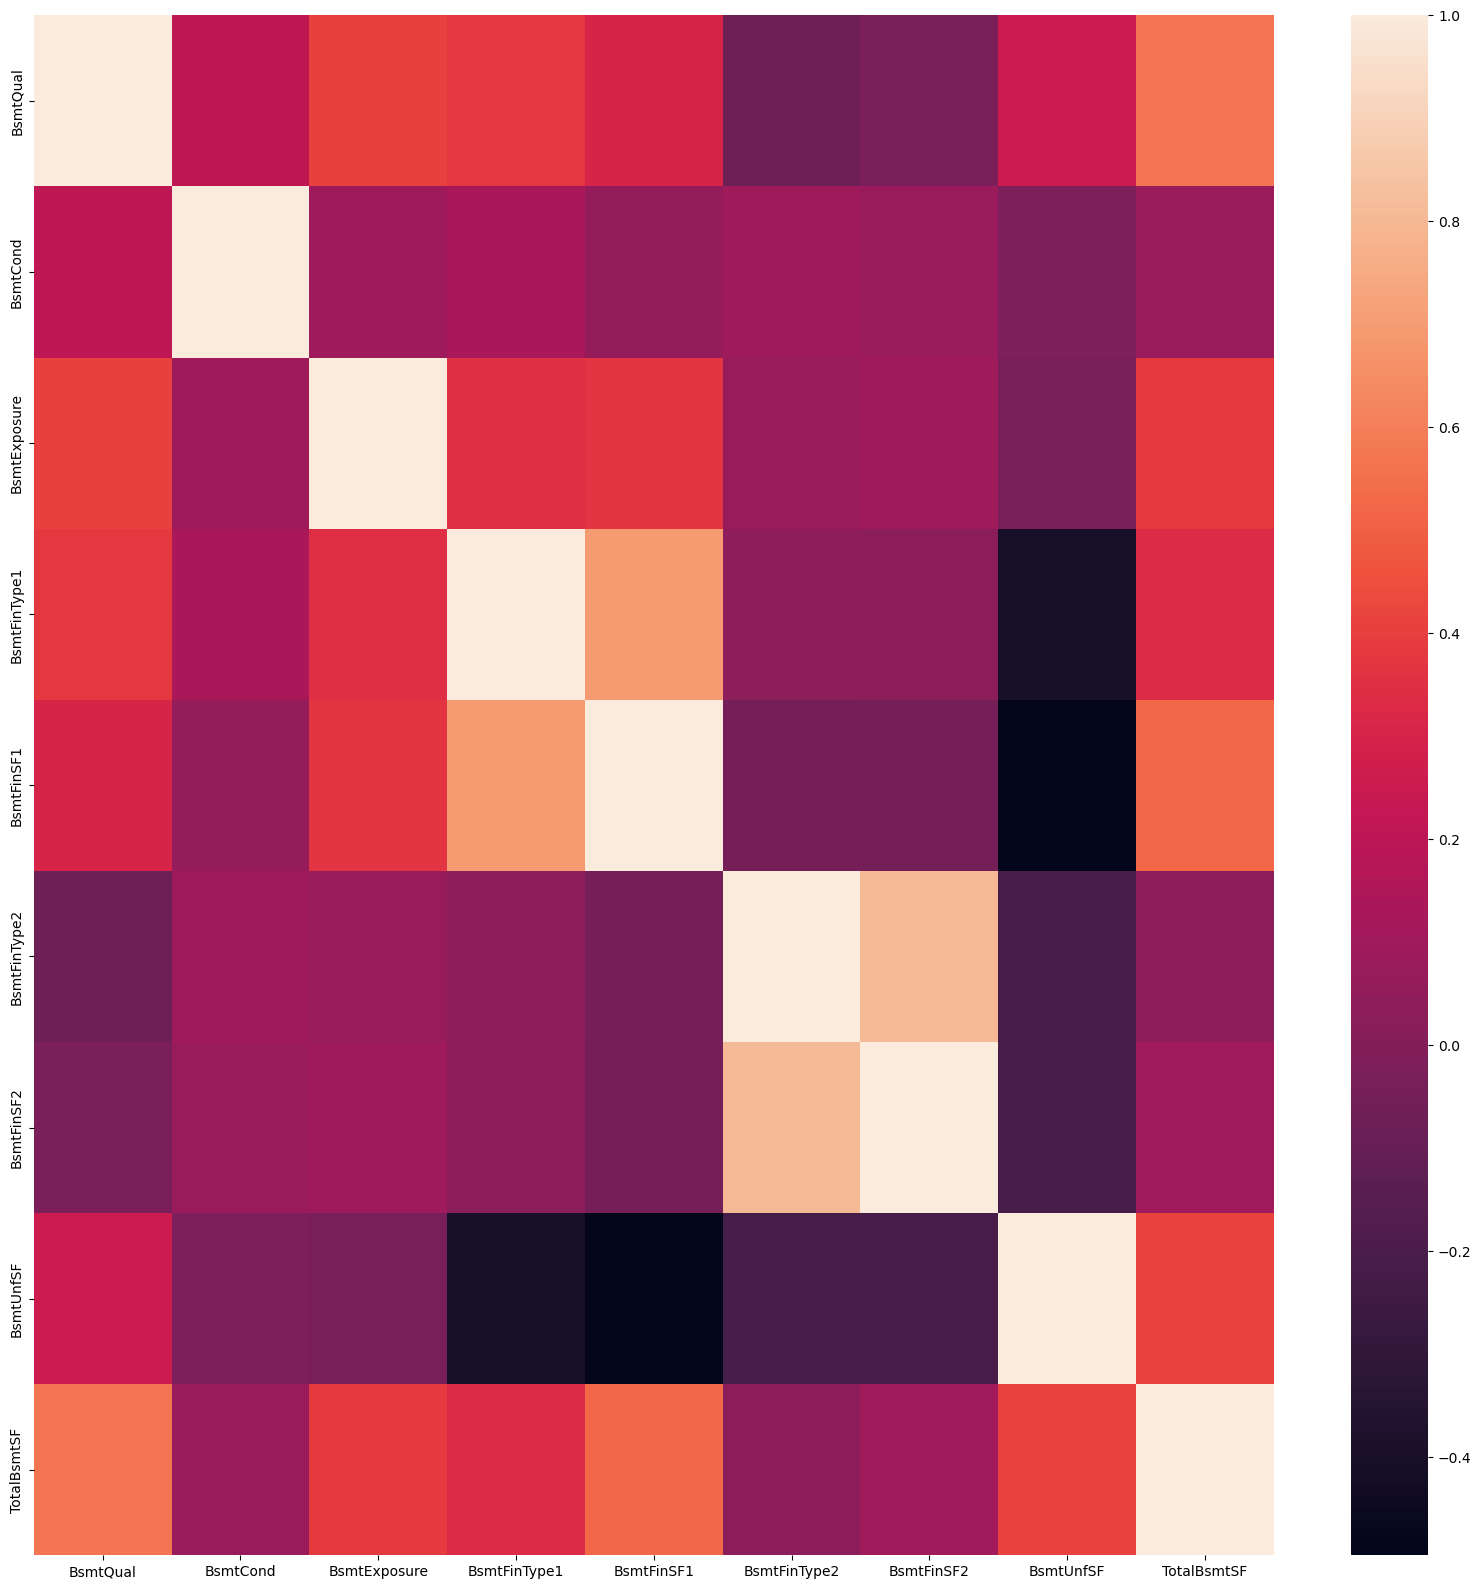

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

basement_features_df = train_df[basement_features]

plt.figure(figsize=(20, 20))
sns.heatmap(basement_features_df.corr())
basement_features_df.head()

From the graph above we notice there is strong correlation between basement size and basement type (BsmtFinSF1 and BsmtFinType1 and also between BsmtFinSF2 and BsmtFinType2). As result, We can safely discard BsmtFinSF1 and BsmtFinSF2 features.

In [10]:
train_df = train_df.drop("BsmtFinSF1", axis = 1)
train_df = train_df.drop("BsmtFinSF2", axis = 1)
test_df = test_df.drop("BsmtFinSF1", axis = 1)
test_df = test_df.drop("BsmtFinSF2", axis = 1)


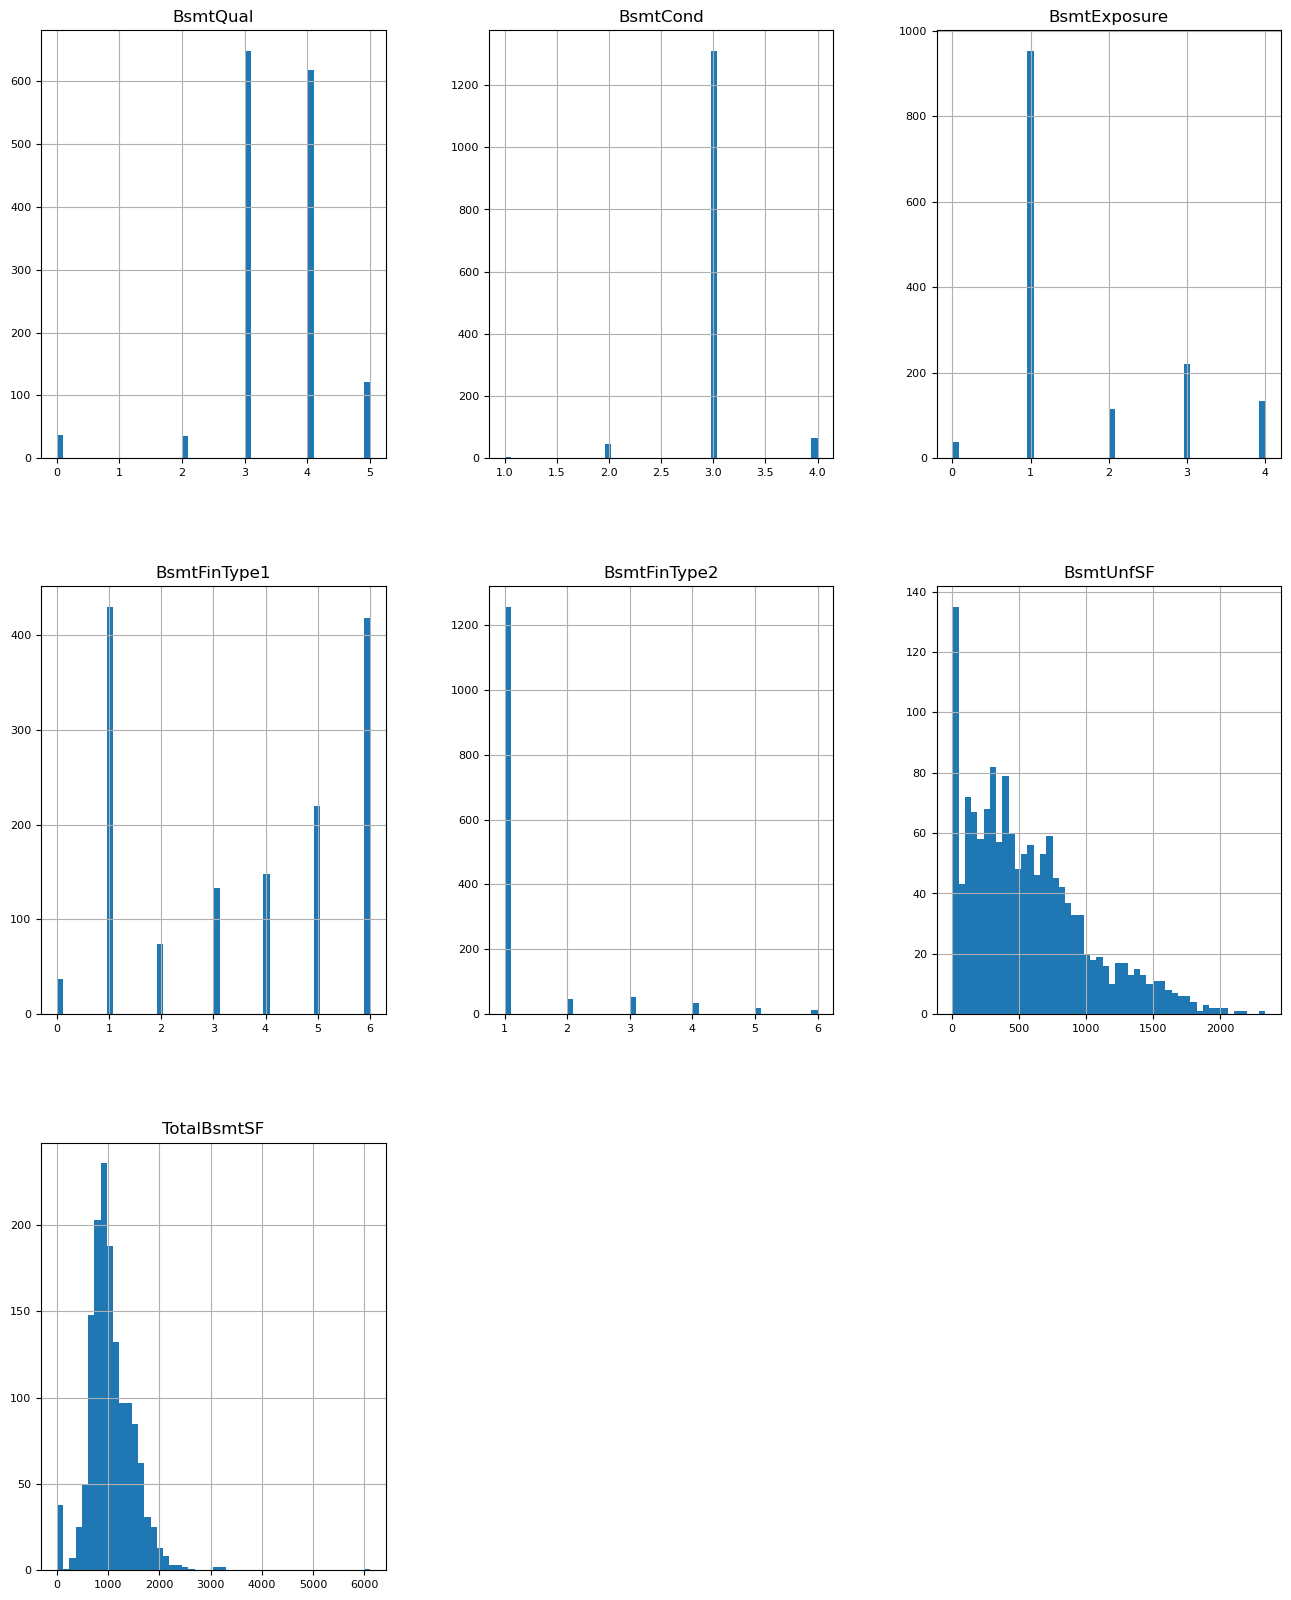

In [11]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtUnfSF", "TotalBsmtSF"]
basement_features_df = train_df[basement_features]
basement_features_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


From the graphs above we notice that both BsmtFinType2 and BsmtCond reflect concentration on 1 value, respectively 3 for BsmCond (most basement have average condition) and 1 for BsmtFinType2 (most basement are Unfinished). Both features will be discarded as they don't add value to the Sales Price prediction.

In [12]:
train_df = train_df.drop("BsmtFinType2", axis = 1)
train_df = train_df.drop("BsmtCond", axis = 1)
test_df = test_df.drop("BsmtFinType2", axis = 1)
test_df = test_df.drop("BsmtCond", axis = 1)

## Porch Features

In [13]:
porch_features = ["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]
porch_features_df = train_df[porch_features]

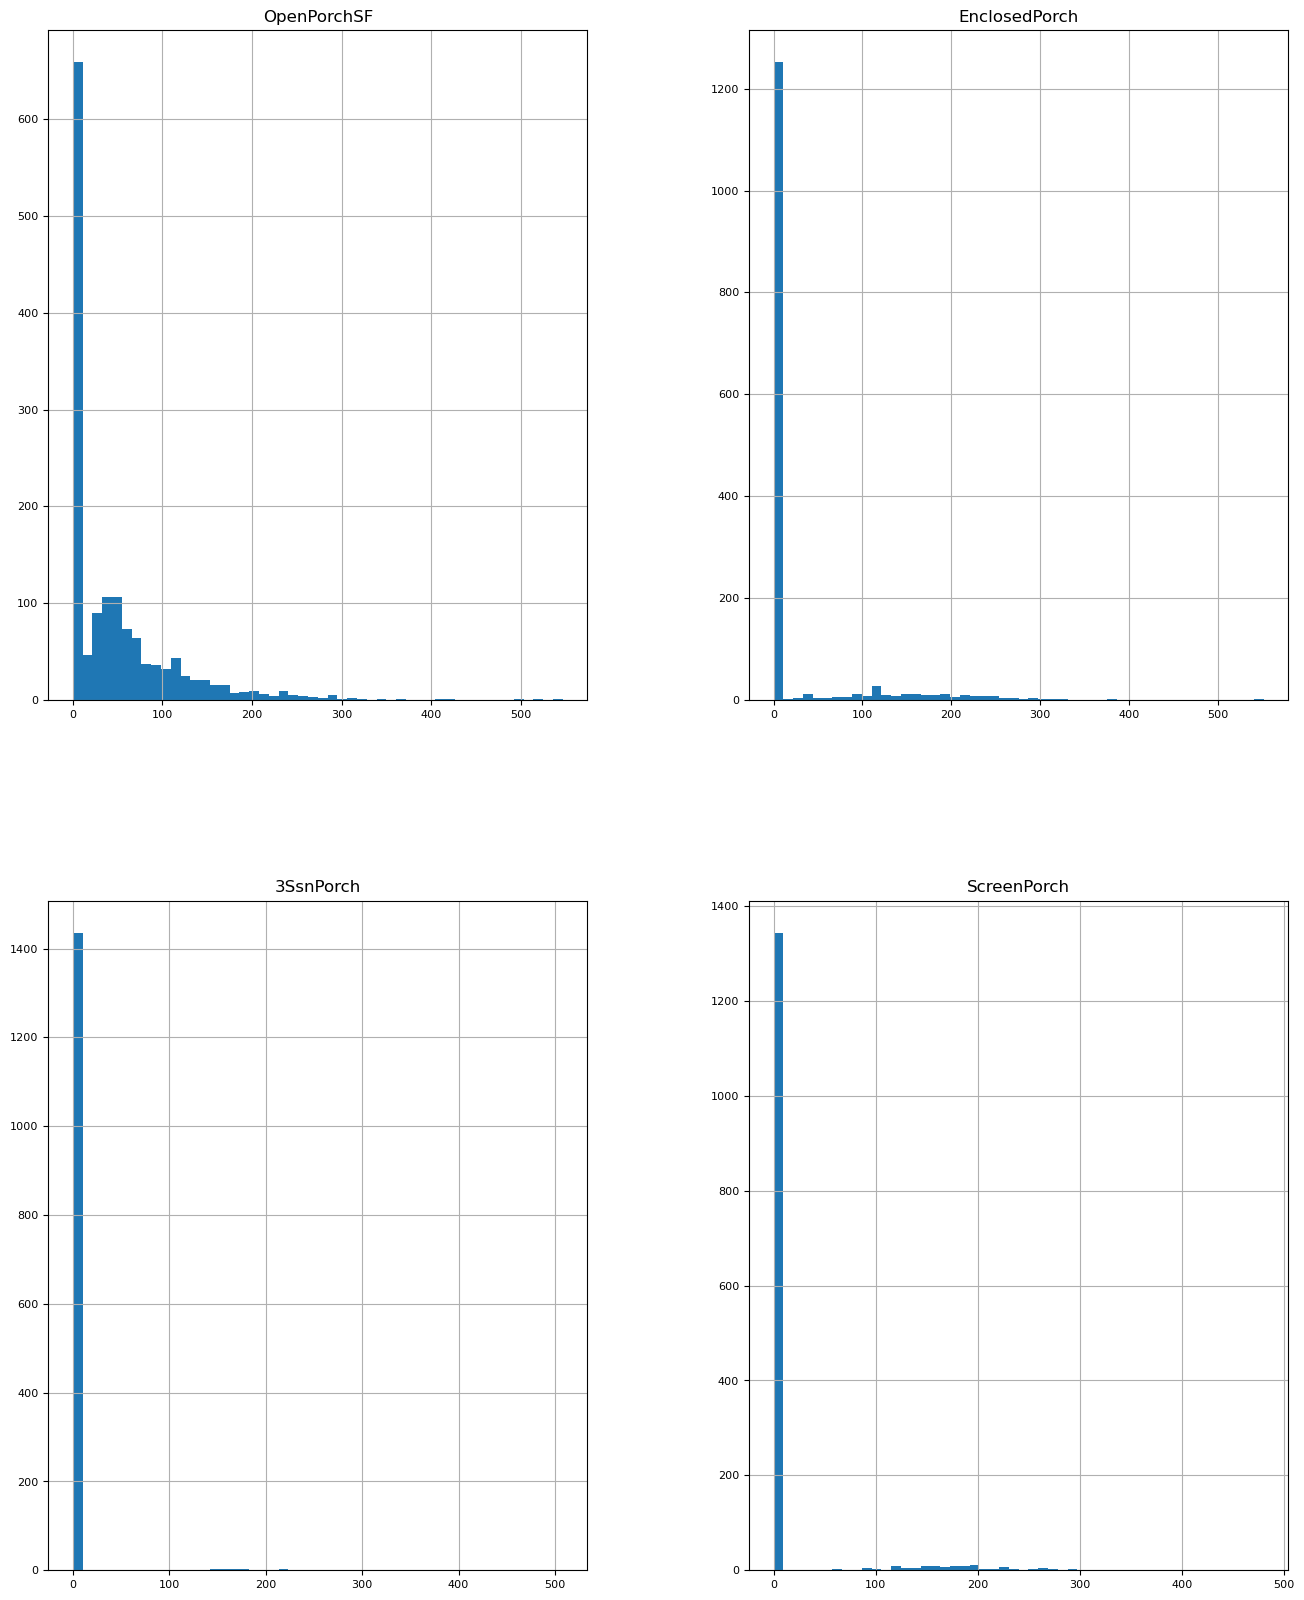

In [14]:
porch_features_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


From the graphs below it is abvious that the majority of the sold houses don't have 3 seasons, screen and enclosed orch areas. Teh following features can be discarded : 3SsnPorch, ScreePorch and EnclosedPorch.

In [15]:
train_df = train_df.drop("ScreenPorch", axis = 1)
train_df = train_df.drop("EnclosedPorch", axis = 1)
train_df = train_df.drop("3SsnPorch", axis = 1)
test_df = test_df.drop("ScreenPorch", axis = 1)
test_df = test_df.drop("EnclosedPorch", axis = 1)
test_df = test_df.drop("3SsnPorch", axis = 1)

## House External Features

External Quality and External Condition features are converted to numerical values as they reflect a magnitude.

In [16]:
ExterQual = {
    "Ex":	5, # Excellent (100+ inches)
    "Gd":	4, # Good (90-99 inches)
    "TA":	3, # Typical (80-89 inches)
    "Fa":	2, # Fair (70-79 inches)
    "Po":	1, # Poor (<70 inches
    "NA":	0  # No basement
}

ExterCond = {
    "Ex":	5, # Excellent (100+ inches)
    "Gd":	4, # Good (90-99 inches)
    "TA":	3, # Typical (80-89 inches)
    "Fa":	2, # Fair (70-79 inches)
    "Po":	1, # Poor (<70 inches
    "NA":	0  # No basement
}

train_df.replace(
    {
        "ExterCond": ExterCond,
        "ExterQual": ExterQual
    },
    inplace=True,
)
test_df.replace(
    {
        "ExterCond": ExterCond,
        "ExterQual": ExterQual
    },
    inplace=True,
)

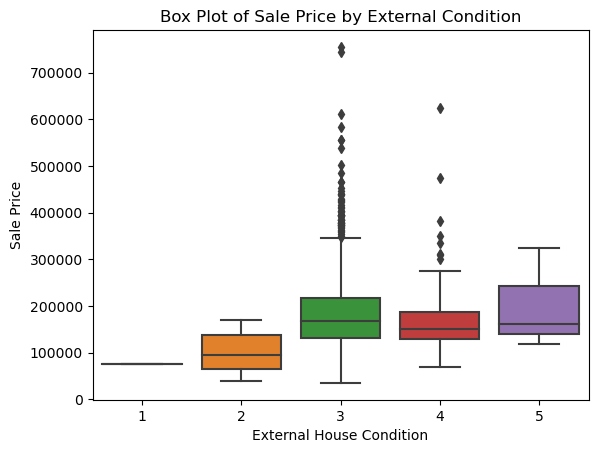

In [17]:
sns.boxplot(x=train_df['ExterCond'], y=train_df['SalePrice'])
plt.xlabel('External House Condition')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by External Condition')
plt.show()

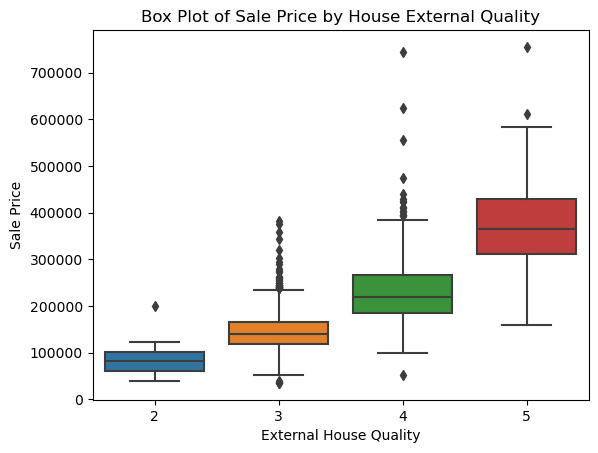

In [18]:
sns.boxplot(x=train_df['ExterQual'], y=train_df['SalePrice'])
plt.xlabel('External House Quality')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by House External Quality')
plt.show()

The graphs above clearly show that House Sale Price increase when external house condition or quality increase.

Most sold houses have Standard (Composite) Shingle roof. We can safely discard the feature: RoofMatl

ClyTile (Clay or Tile)
CompShg (Standard (Composite) Shingle): 1434
Membran	(Membrane) : 1
Metal (Metal) : 1
Roll (Roll) : 1
Tar&Grv	(Gravel & Tar) : 11
WdShake	(Wood Shakes) : 5
WdShngl	(Wood Shingles) : 6

In [19]:
train_df = train_df.drop("RoofMatl", axis = 1)
test_df = test_df.drop("RoofMatl", axis = 1)

We could use one hot encoding for the remaining exterior categorial features but this will lead to multiplication additional features without the guarantee that it adds value in the sales prediction algorithm. I decided to only keep the numerical features External Quality and External Condition since based on the graph above the correlate well with the Sales Price.


In [20]:
train_df = train_df.drop("Exterior1st", axis = 1)
test_df = test_df.drop("Exterior1st", axis = 1)
train_df = train_df.drop("Exterior2nd", axis = 1)
test_df = test_df.drop("Exterior2nd", axis = 1)
train_df = train_df.drop("MasVnrArea", axis = 1)
test_df = test_df.drop("MasVnrArea", axis = 1)
train_df = train_df.drop("Foundation", axis = 1)
test_df = test_df.drop("Foundation", axis = 1)


## Lot Shape and Size Features

In [21]:
location_features = ["LotFrontage", "LandSlope", "LotArea", "LotShape", "LandContour", "LotConfig", ]

LandSlope, LotSlope and LandContour are categorial fetaures that can be easily replaced with numerical categories as the denote a magnitude

In [22]:
LandSlope = {
    "Gtl" : 1, # Gentle Slope
    "Mod" : 2, # Moderate Moderate
    "Sev" : 3  # Severe Slope
}

LotShape = {
    "Reg" :	1, # Regular Shape
    "IR1" : 2, # Slightly Irregular Shape
    "IR2" : 3, # Moderately Irregular Shape
    "IR3" :	4  # Irregular
}

LandContour = {
    "Lvl" : 1,  # Near Flat/Level
    "Bnk" :	2,  # Banked - Quick and significant rise from street grade to building
    "HLS" : 3,  # Hillside - Significant slope from side to side
    "Low": 4	# Depression
}

LotConfig =  { #Lot configuration
    "Inside"	: 1, # Inside lot
    "Corner"	: 2, # Corner lot
    "CulDSac"	: 3, #Cul-de-sac
    "FR2"	: 4,  #Frontage on 2 sides of property
    "FR3"	: 5,  #Frontage on 3 sides of property
}

train_df.replace(
    {
        "LandSlope": LandSlope,
        "LotShape": LotShape,
        "LandContour": LandContour,
        "LotConfig": LotConfig,
    },
    inplace=True,
)

test_df.replace(
    {
        "LandSlope": LandSlope,
        "LotShape": LotShape,
        "LandContour": LandContour,
        "LotConfig": LotConfig,

    },
    inplace=True,
)

LotSlop and LandContour features both describe inclinaison of the lot and land on which the house is built. The
correlation graph confirms a corelation of close to 0.7. We can safely discard LandContour in favour of LotSlop feature.

<Axes: >

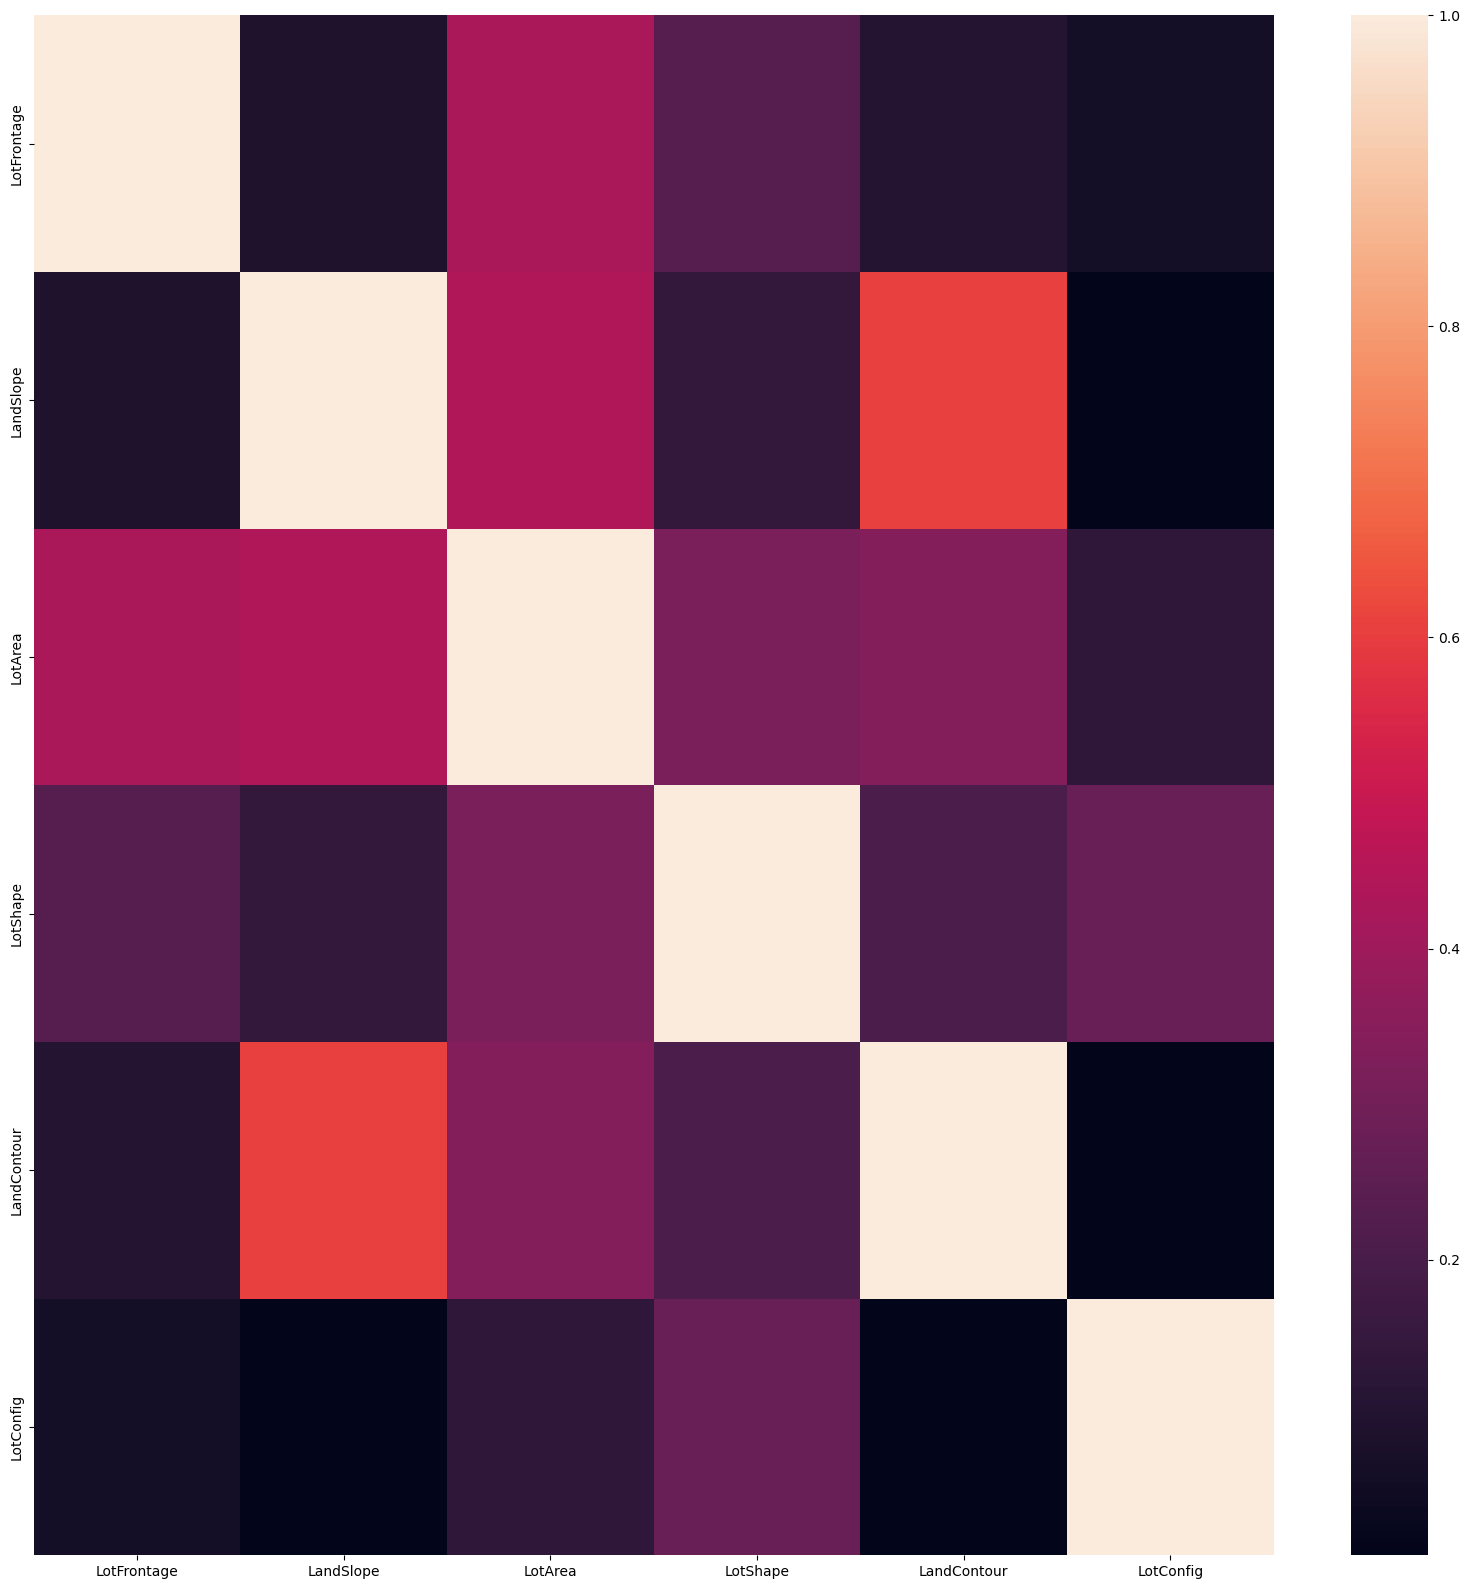

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

location_features_df = train_df[location_features]

plt.figure(figsize=(20, 20))
sns.heatmap(location_features_df.corr())

In [24]:
train_df = train_df.drop("MSZoning", axis = 1)
test_df = test_df.drop("MSZoning", axis = 1)
train_df = train_df.drop("Condition1", axis = 1)
test_df = test_df.drop("Condition1", axis = 1)
train_df = train_df.drop("Condition2", axis = 1)
test_df = test_df.drop("Condition2", axis = 1)

### Home Size Feature : TotRmsAbvGrd, Bedroom, GrLivArea, 1stFlrSF, 2ndFlrSF


It is known that the size of the house contribute  impact the price of the house.

In [25]:
house_size_features = ["TotRmsAbvGrd", "BedroomAbvGr", "GrLivArea", "1stFlrSF", "2ndFlrSF"]


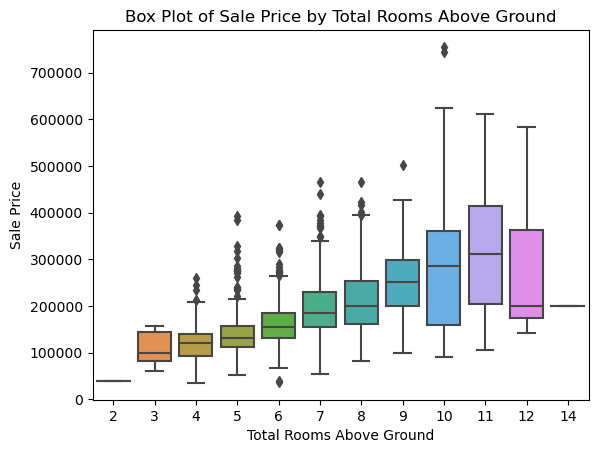

In [26]:
sns.boxplot(x=train_df['TotRmsAbvGrd'], y=train_df['SalePrice'])
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Total Rooms Above Ground')
plt.show()

We can notice from the graph above that increase in the number of rooms result in sale price increase. However, from 8 room to above the increase is not obvious from the graph.

Let's confirm if the same applies for the remaining features:

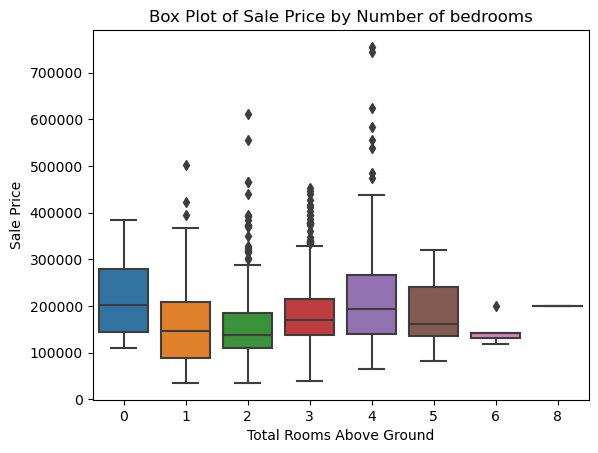

In [27]:
sns.boxplot(x=train_df['BedroomAbvGr'], y=train_df['SalePrice'])
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Number of bedrooms')
plt.show()

In [28]:
train_df["BedroomAbvGr"].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

Surprisly the same doesn't apply to the feature 'BedroomAbvGr'. The graph shows that Houses with 0 bedroooms has the highest sales price. There are only 6 houses with 0 bedrooms. Let's inspect their sales data to find any anomaly in data:

In [29]:
train_df[train_df["BedroomAbvGr"] == 0]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,68.0,50271,Pave,NaN,2,4,AllPub,1,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
189,190,120,41.0,4923,Pave,NaN,1,1,AllPub,1,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,286000
634,635,90,64.0,6979,Pave,NaN,1,1,AllPub,1,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
1163,1164,90,60.0,12900,Pave,NaN,1,1,AllPub,1,...,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,108959
1213,1214,80,NaN,10246,Pave,NaN,2,1,AllPub,3,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1270,1271,40,NaN,23595,Pave,NaN,1,4,AllPub,1,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,260000


,TotRmsAbvGrd,BedroomAbvGr,GrLivArea,1stFlrSF,2ndFlrSF
0,8,3,1710,856,854
1,6,3,1262,1262,0
2,6,3,1786,920,866
3,7,3,1717,961,756
4,9,4,2198,1145,1053


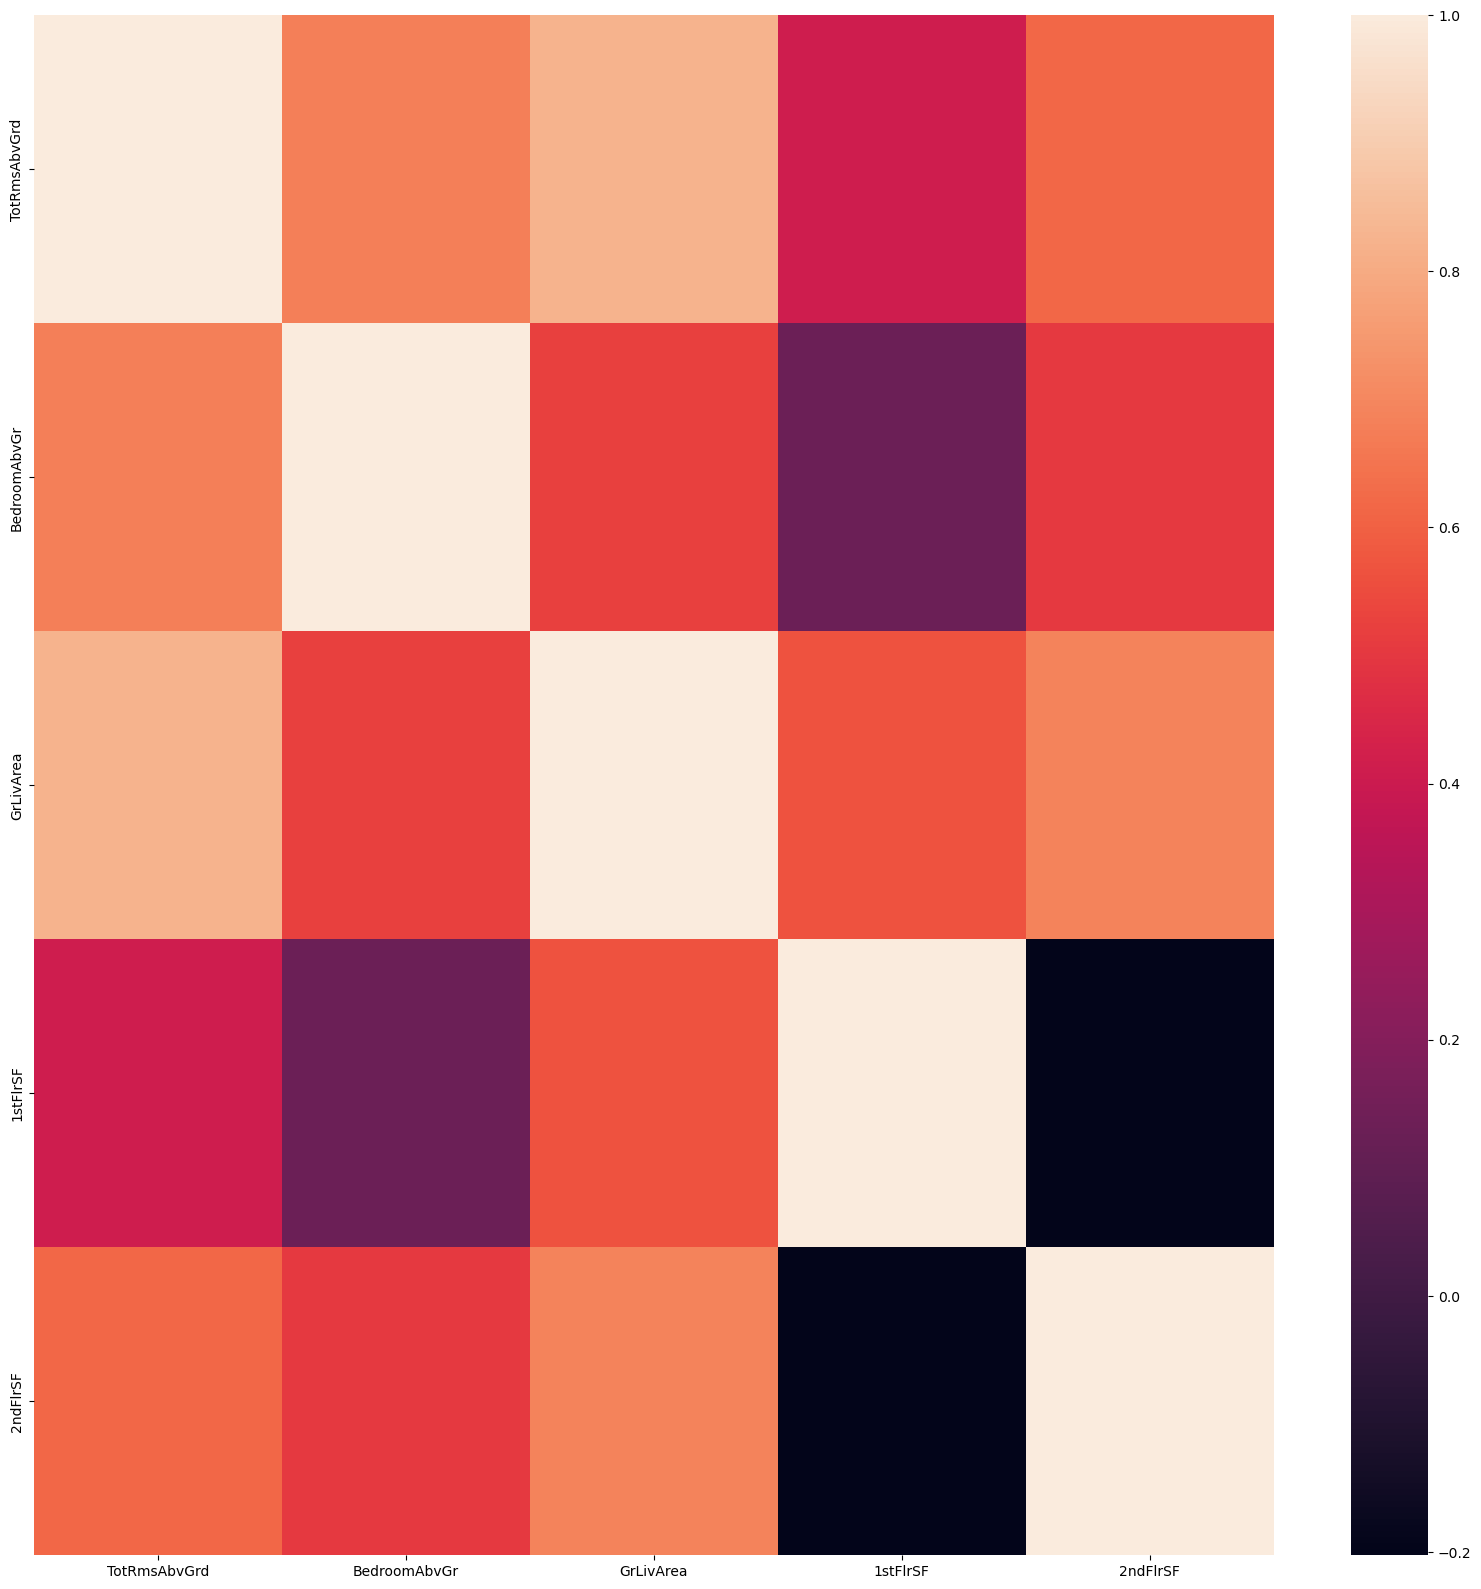

In [30]:
house_size_features_df = train_df[house_size_features]

plt.figure(figsize=(20, 20))
sns.heatmap(house_size_features_df.corr())
house_size_features_df.head()

We notice from the graph a strong correlation between the features: Living Area Above Ground (GrLivArea), Total Rooms Above Ground (BedroomAbvGr) and Total Rooms Above Ground (TotalRmsAbvGrd). Also, I decided to discard the features 1 floor size (1nstFrSF) and 2 floor size (2nstFrSF) for a seek of simplicity.

In [31]:
train_df = train_df.drop("1stFlrSF", axis = 1)
test_df = test_df.drop("1stFlrSF", axis = 1)
train_df = train_df.drop("2ndFlrSF", axis = 1)
test_df = test_df.drop("2ndFlrSF", axis = 1)
train_df = train_df.drop("BedroomAbvGr", axis = 1)
test_df = test_df.drop("BedroomAbvGr", axis = 1)

## Garage Features

In [32]:
garage_features = ["GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]

In [33]:
train_df[garage_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageYrBlt   1379 non-null   float64
 1   GarageFinish  1379 non-null   object 
 2   GarageCars    1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   GarageQual    1379 non-null   object 
 5   GarageCond    1379 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 68.6+ KB


GarageCars may have null values. GarageCars field with null value will be repalaced with as it denote a garage is not available with house.

In [34]:
train_df["GarageQual"] = train_df["GarageQual"].fillna(0)
test_df["GarageQual"] = test_df["GarageQual"].fillna(0)
train_df["GarageCond"] = train_df["GarageCond"].fillna(0)
test_df["GarageCond"] = test_df["GarageCond"].fillna(0)
test_df["GarageCars"] = test_df["GarageCars"].fillna(0)
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(0)
test_df["GarageYrBlt"] = test_df["GarageYrBlt"].fillna(0)
train_df["GarageFinish"] = train_df["GarageFinish"].fillna(0)
test_df["GarageFinish"] = test_df["GarageFinish"].fillna(0)

## Garage Features

GarageCond, GarageQual and GarageFinish are non-numerical features. However, since quality is a feature that can be measured and has a magnitude GarageQual and GarageCond will be converted to numerical categories. Same apply to GarageFinish feature since it also reflects a magnitute (how much of basement space is finished)

In [35]:
GarageQual = {
    "Ex": 5, # Excellent
    "Gd": 4, # Good
    "TA": 3, # Typical/Average
    "Fa": 2, # Fair
    "Po": 1, # Poor
    "NA": 0  # No Garage
}
GarageCond = {
    "Ex": 5, #	Excellent,
    "Gd": 4, #	Good,
    "TA": 3, #	Typical/Average
    "Fa": 2, #  Fair
    "Po": 1, #  Poor
    "NA": 0  # No Garage
}

GarageFinish = {
    # Interior finish of the garage
    "Fin":	3, # Finished
    "RFn":	2, # Rough Finished
    "Unf":	1, # Unfinished
    "NA": 0,   # No Garage
}

garage_features = ["GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]

train_df[garage_features]

train_df.replace(
    {
        "GarageFinish": GarageFinish,
        "GarageCond": GarageCond,
        "GarageQual": GarageQual
    },
    inplace=True,
)
test_df.replace(
    {
        "GarageFinish": GarageFinish,
        "GarageCond": GarageCond,
        "GarageQual": GarageQual
    },
    inplace=True,
)



In [42]:
garage_features_df

,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,2003.0,2,2,548,3,3
1,1976.0,2,2,460,3,3
2,2001.0,2,2,608,3,3
3,1998.0,1,3,642,3,3
4,2000.0,2,3,836,3,3
...,...,...,...,...,...,...
1455,1999.0,2,2,460,3,3
1456,1978.0,1,2,500,3,3
1457,1941.0,2,1,252,3,3
1458,1950.0,1,1,240,3,3


The correlation graph below highlight that fact that GarageArea (Garage size in square footage) and GarageCars (number of cars that can fit in the garage) are strongly correlated. As result of that, I will discard GarageArea.

,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,2003.0,2,2,548,3,3
1,1976.0,2,2,460,3,3
2,2001.0,2,2,608,3,3
3,1998.0,1,3,642,3,3
4,2000.0,2,3,836,3,3


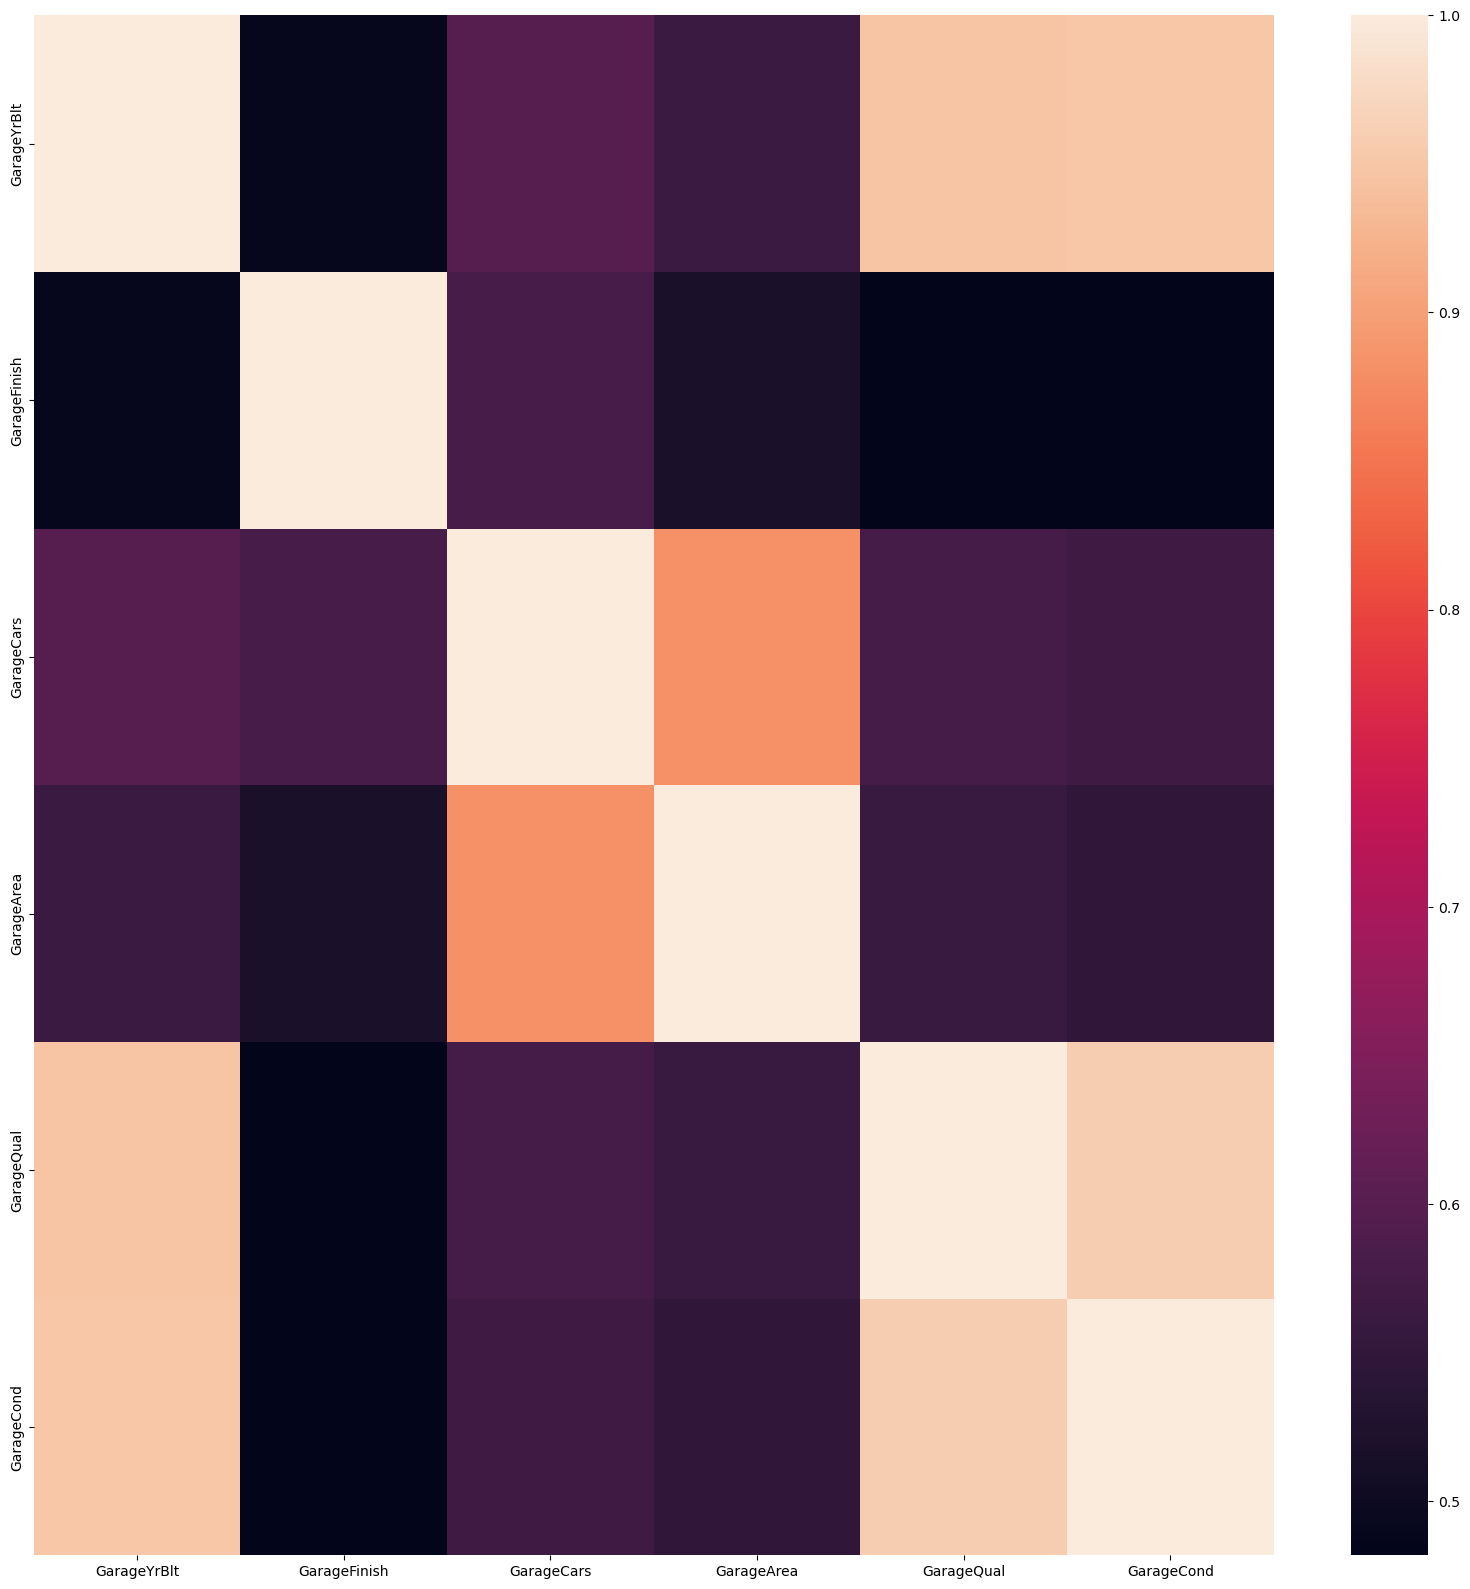

In [44]:

plt.figure(figsize=(20, 20))
sns.heatmap(garage_features_df.corr())
garage_features_df.head()

In [45]:
train_df = train_df.drop("GarageArea", axis = 1)
test_df = test_df.drop("GarageArea", axis = 1)

KeyError: "['GarageArea'] not found in axis"

## Utilities Featutes


In [46]:
utilities_features = ["Electrical", "Utilities", "Fireplaces", "FireplaceQu", "Heating", "HeatingQC", "CentralAir"]


In [47]:
utilities_features_df = train_df[utilities_features]
utilities_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Electrical   1459 non-null   object
 1   Utilities    1460 non-null   object
 2   Fireplaces   1460 non-null   int64 
 3   FireplaceQu  770 non-null    object
 4   Heating      1460 non-null   object
 5   HeatingQC    1460 non-null   object
 6   CentralAir   1460 non-null   object
dtypes: int64(1), object(6)
memory usage: 80.0+ KB


Fireplace quality feature (FireplaceQu) reflect a magnitude. However, it have a non-numerical value. We can convert it to numerical values reflecing values increasing from 0 (no fireplace) to 5 (fireplace in excellent condition).

In [48]:
fireplace_quality = {
    "Ex": 5, # Excellent - Exceptional Masonry Fireplace
    "Gd": 4, # Good - Masonry Fireplace in main level
    "TA": 3, # Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    "Fa": 2, # Fair - Prefabricated Fireplace in basement
    "Po": 1, # Poor - Ben Franklin Stove
    "NA": 0  # No Fireplace
}
train_df.replace(
    {
        "FireplaceQu": fireplace_quality,
    },
    inplace=True,
)

test_df.replace(
    {
        "FireplaceQu": fireplace_quality,
    },
    inplace=True,
)

The features "Electrical", "Utilities", "Heating", "HeatingQC" and "CentralAir" will be discarded as they don't manifest a normal distribution. For example all entries have Utilities except 1 as "AllPubl" (All public Utilities)

In [49]:
train_df = train_df.drop("Electrical", axis=1)
test_df = test_df.drop("Electrical", axis=1)


In [50]:
train_df = train_df.drop("Utilities", axis = 1)
test_df = test_df.drop("Utilities", axis = 1)

In [51]:
train_df = train_df.drop("Heating", axis = 1)
test_df = test_df.drop("Heating", axis = 1)

In [52]:
train_df = train_df.drop("HeatingQC", axis = 1)
test_df = test_df.drop("HeatingQC", axis = 1)

In [53]:
train_df = train_df.drop("CentralAir", axis = 1)
test_df = test_df.drop("CentralAir", axis = 1)

## Kitchen Features

In [54]:
kitchen_features = ["KitchenAbvGr", "KitchenQual"]

My feeling is that the kitchen quality matters more in influencing the sales price of the house. Most houses will have 1 kitchen. Indeed, from the collected data only 4% of the houses have 2 kitchens, 1 house has no kitchen and 2 houses have 3 kitchens. It is safe to discard this feature as it doesn't add value to the sales prediction.

In [55]:
train_df["KitchenAbvGr"].value_counts()


1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [56]:
train_df = train_df.drop("KitchenAbvGr", axis = 1)
test_df = test_df.drop("KitchenAbvGr", axis = 1)

The feature "KitchenQual" can be transformed to a numerical value as it reflect a magnitude.


In [57]:
kitchen_quality = {
    "Ex": 5, # Excellent - Exceptional Masonry Fireplace
    "Gd": 4, # Good - Masonry Fireplace in main level
    "TA": 3, # Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    "Fa": 2, # Fair - Prefabricated Fireplace in basement
    "Po": 1, # Poor - Ben Franklin Stove
}

train_df.replace(
    {
        "KitchenQual": kitchen_quality,
    },
    inplace=True,
)
test_df.replace(
    {
        "KitchenQual": kitchen_quality,
    },
    inplace=True,
)

## Pool Features

From the home sales data only 7 houses out of 1460 have a swimming pool. We can safely discard pool featured as it doesn't add value to the sales price prediction.

In [58]:
pool_features = ["PoolArea", "PoolQC"]
train_df["PoolArea"].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [59]:
train_df = train_df.drop("PoolArea", axis = 1)
test_df = test_df.drop("PoolArea", axis = 1)

In [60]:
train_df = train_df.drop("PoolQC", axis = 1)
test_df = test_df.drop("PoolQC", axis = 1)

## Bathrooms Features


I decided that half bath can be counted as full bath. As result, new features are created total_bathroom and total_basement_bathroom replacing FullBath, HalfBath, BsmtHalfBath and BsmtFullBath. I found this approach will simply the model whithout scarifying the precision of the prediction.

In [61]:
train_df["total_bathroom"] =  train_df["FullBath"] + train_df["HalfBath"]
train_df["total_basement_bathroom"] =  train_df["BsmtHalfBath"] + train_df["BsmtFullBath"]

test_df["total_bathroom"] =  test_df["FullBath"] + test_df["HalfBath"]
test_df["total_basement_bathroom"] =  test_df["BsmtHalfBath"] + test_df["BsmtFullBath"]

bathroom_features = ["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "total_bathroom", "total_basement_bathroom"]

<Axes: >

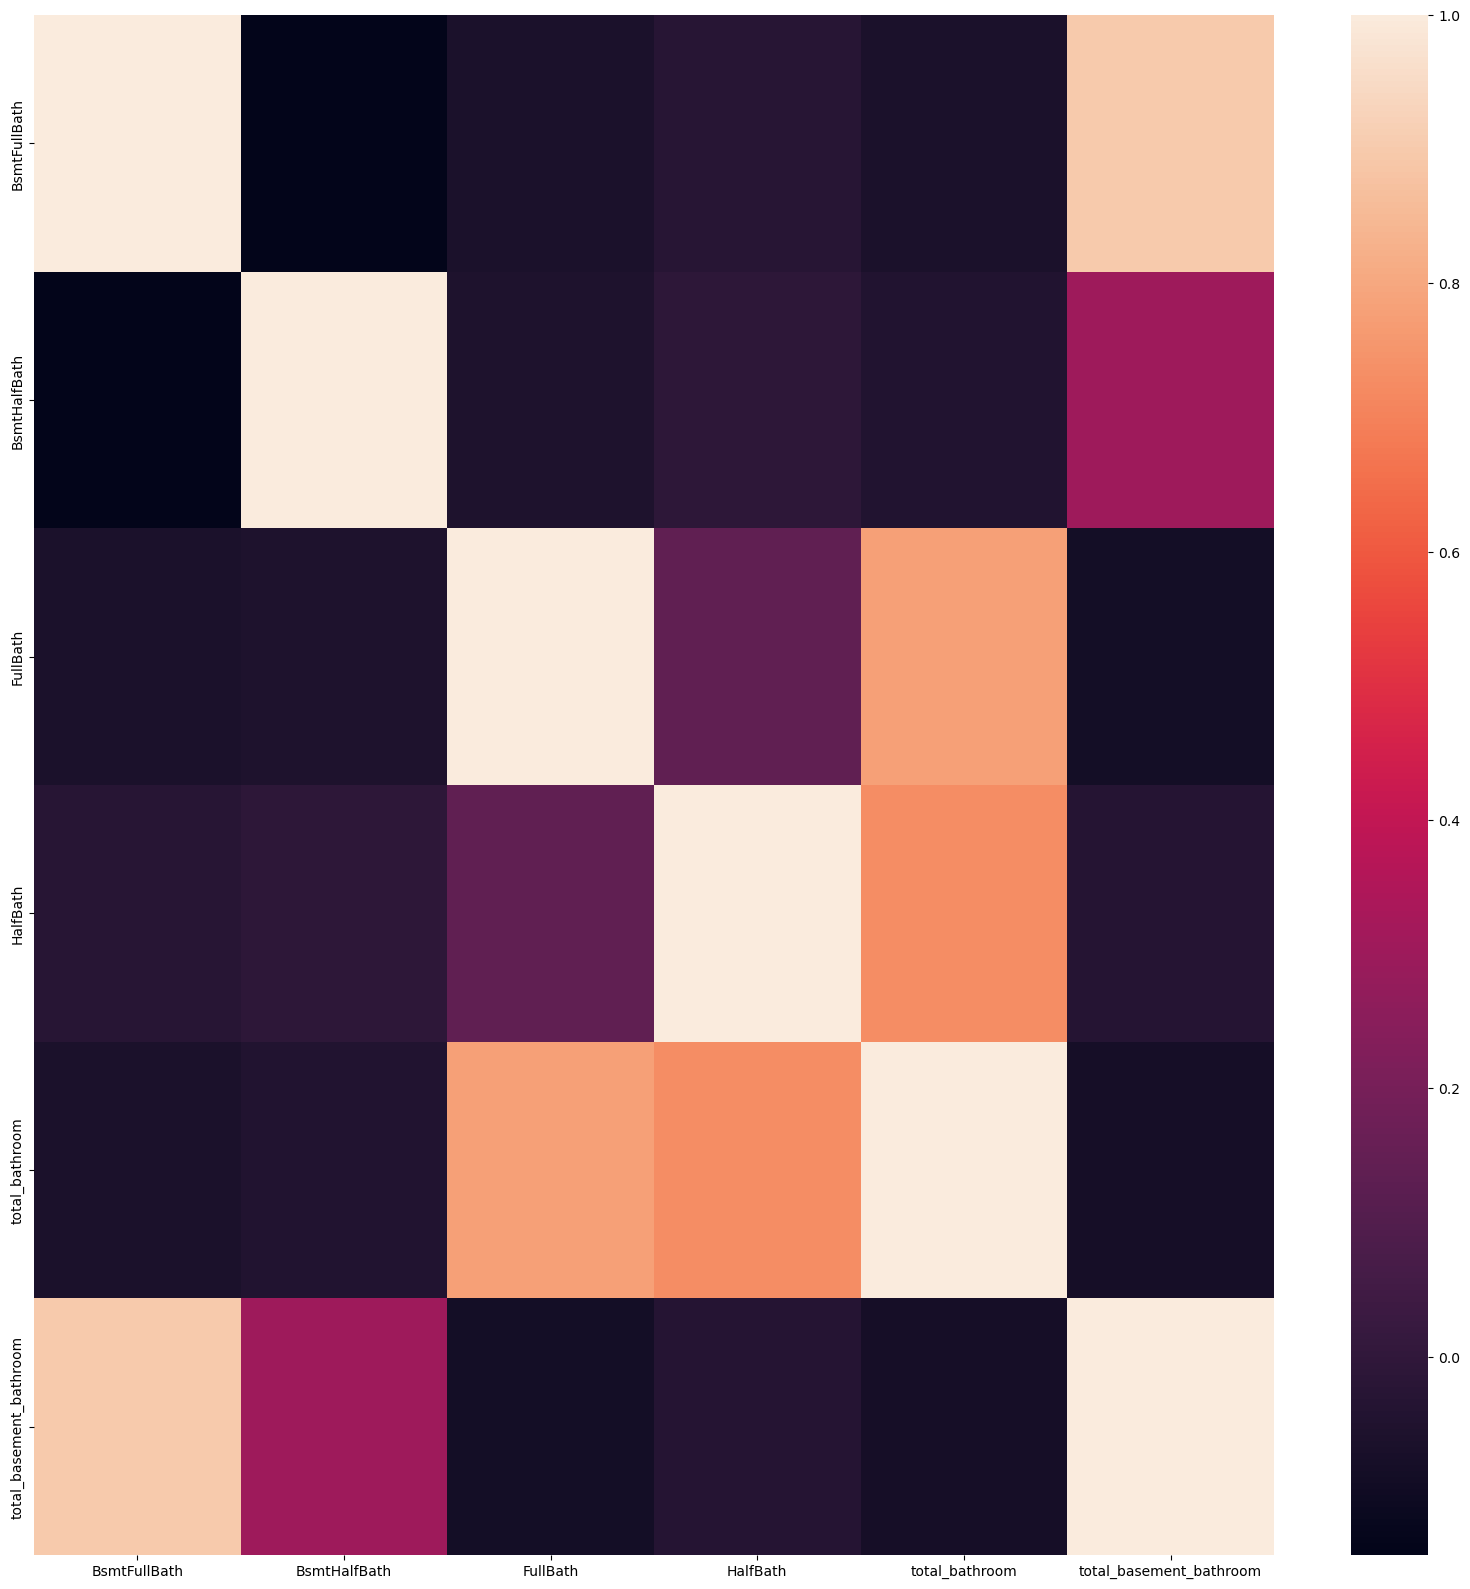

In [62]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df[bathroom_features].corr())

We can conclude from that decision to introduce the new features: total_bathroom and total_basement_bathroom was right since the graph above clearly shows a correlation between: FullBath and total_bathroom and between BsmtFullBath and total_basement_bathroom and also between HalfBath and total_bathroom and BsmtHalfBath and total_basement_bathroom .

In [63]:
train_df = train_df.drop("BsmtFullBath", axis = 1)
test_df = test_df.drop("BsmtFullBath", axis = 1)
train_df = train_df.drop("BsmtHalfBath", axis = 1)
test_df = test_df.drop("BsmtHalfBath", axis = 1)
train_df = train_df.drop("FullBath", axis = 1)
test_df = test_df.drop("FullBath", axis = 1)
train_df = train_df.drop("HalfBath", axis = 1)
test_df = test_df.drop("HalfBath", axis = 1)

## Home Type features


The building type fearture ("BldgType") and House Style feature ("HouseStyle") can be converted to numerical category as it reflect a magnitude.

In [64]:
BldgType = {
    "1Fam" : 1, #	Single-family Detached
    "2FmCon" : 2,	# Two-family Conversion; originally built as one-family dwelling
    "2fmCon" : 2,	# Two-family Conversion; originally built as one-family dwelling
    "Duplx" : 3, 	# Duplex
    "Duplex" : 3, 	# Duplex
    "TwnhsE" : 4,	# Townhouse End Unit
    "Twnhs" : 4,	# Townhouse End Unit
    "TwnhsI" : 5	# Townhouse Inside Unit
}

HouseStyle = {
    "1Story" : 1,  #	One story
    "1.5Unf" :	2, #, # One and one-half story: 2nd level unfinished
    "1.5Fin" :	3, # One and one-half story: 2nd level finished
    "2Story" : 4, #	Two story
    "2.5Unf" :	5, # Two and one-half story: 2nd level unfinished
    "2.5Fin" : 6, #	Two and one-half story: 2nd level finished
    "SFoyer" : 7, #	Split Foyer
    "SLvl"	: 8  # Split Level
}

train_df.replace(
    {
        "BldgType": BldgType,
    },
    inplace=True,
)

test_df.replace(
    {
        "BldgType": BldgType,
    },
    inplace=True,
)

train_df.replace(
    {
        "HouseStyle": HouseStyle,
    },
    inplace=True,
)

test_df.replace(
    {
        "HouseStyle": HouseStyle,
    },
    inplace=True,
)
home_type_features = ["BldgType", "HouseStyle", "MSSubClass"]

<Axes: >

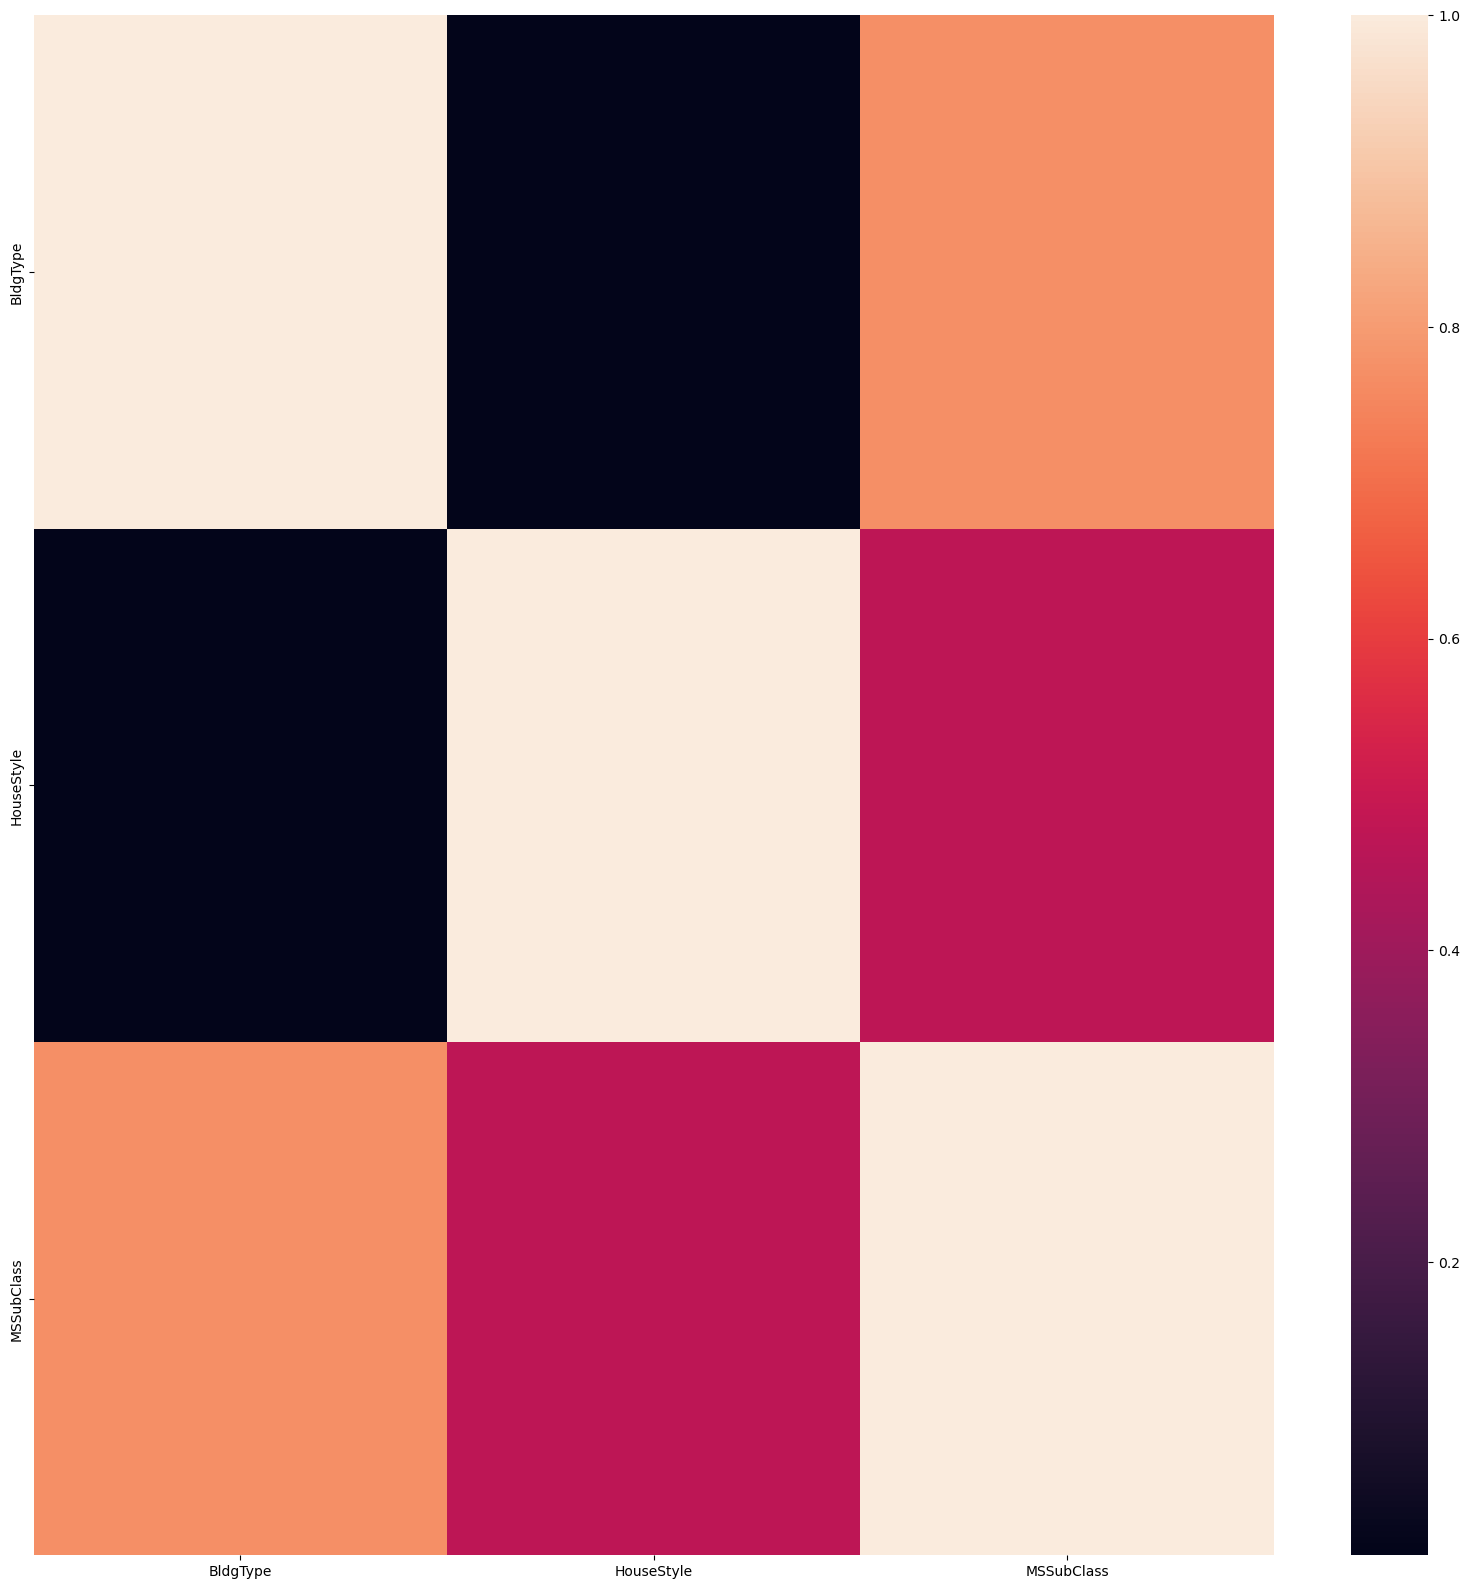

In [65]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df[home_type_features].corr())

From the graph above, we can clearly see that  MSSubClass correlate with BldgType. The feature MSSubClass can be discarded.


In [66]:
train_df = train_df.drop("MSSubClass", axis = 1)
test_df = test_df.drop("MSSubClass", axis = 1)

## Feature : Neighborhood

I decided to have special treatment for the feature: Neighborhood. It is known that Neighborhood is known to have direct influence on the house price. Usually, people are more attracted to safe Neighborhood with good school ranking. However, the data at our hand doesn't record the ranking of a given neighborhood so we can't use a numeric value to denote a magnitude (i.e.: from pool to rich neighborhood, or dangerous to extremely safe neighborhood). Also, the Neighborhood is defined as a non-numerical category. In this scenario, one hot encoding will be at our rescue. There are 34 Neighborhood. The feature Neighborhood will be replaced with 34 new Boolean features where each feature. This has to downsize of adding performance overhead to the prediction model, but we can't just ignore this feature as it has significant impact on the price.

In [67]:
train_df = pd.get_dummies(train_df, columns=["Neighborhood"], prefix="Neighborhood")


In [68]:
test_df = pd.get_dummies(test_df, columns=["Neighborhood"], prefix="Neighborhood")


In [69]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   LotFrontage              1201 non-null   float64
 2   LotArea                  1460 non-null   int64  
 3   Street                   1460 non-null   object 
 4   Alley                    91 non-null     object 
 5   LotShape                 1460 non-null   int64  
 6   LandContour              1460 non-null   int64  
 7   LotConfig                1460 non-null   int64  
 8   LandSlope                1460 non-null   int64  
 9   BldgType                 1460 non-null   int64  
 10  HouseStyle               1460 non-null   int64  
 11  OverallQual              1460 non-null   int64  
 12  OverallCond              1460 non-null   int64  
 13  YearBuilt                1460 non-null   int64  
 14  YearRemodAdd            

## Other Features

For a seek of simplicity I decided to discard the following features as they seems not adding a significant value to the price prediction model based on the business domain in context (real estate)

In [70]:
# to_be_dropped_features = ["Id", "Street", "BsmtExposure", "ExterCond", "SaleCondition", "BsmtUnfSF", "BsmtExposure", "BsmtFinType1", "LandContour", "LandSlope", "LotConfig", "LotShape", "LotFrontage", "Fireplaces", "FireplaceQu", "Alley", "YearBuilt" ,"YearRemodAdd" , "RoofStyle" , "MasVnrType","Functional" , "GarageType" , "GarageYrBlt", "GarageFinish" , "PavedDrive" , "WoodDeckSF" , "OpenPorchSF" , "Fence" , "GarageQual", "GarageCond", "MiscFeature" , "MiscVal" , "MoSold" , "YrSold" , "SaleType"]

# train_df = train_df.drop(to_be_dropped_features,  axis = 1)
# test_df = test_df.drop(to_be_dropped_features,  axis = 1)

#train_df = train_df.drop("SalePrice_log",  axis = 1)
train_df = train_df.drop("Id",  axis = 1)

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LotFrontage              1201 non-null   float64
 1   LotArea                  1460 non-null   int64  
 2   Street                   1460 non-null   object 
 3   Alley                    91 non-null     object 
 4   LotShape                 1460 non-null   int64  
 5   LandContour              1460 non-null   int64  
 6   LotConfig                1460 non-null   int64  
 7   LandSlope                1460 non-null   int64  
 8   BldgType                 1460 non-null   int64  
 9   HouseStyle               1460 non-null   int64  
 10  OverallQual              1460 non-null   int64  
 11  OverallCond              1460 non-null   int64  
 12  YearBuilt                1460 non-null   int64  
 13  YearRemodAdd             1460 non-null   int64  
 14  RoofStyle               

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LotFrontage              1201 non-null   float64
 1   LotArea                  1460 non-null   int64  
 2   Street                   1460 non-null   object 
 3   Alley                    91 non-null     object 
 4   LotShape                 1460 non-null   int64  
 5   LandContour              1460 non-null   int64  
 6   LotConfig                1460 non-null   int64  
 7   LandSlope                1460 non-null   int64  
 8   BldgType                 1460 non-null   int64  
 9   HouseStyle               1460 non-null   int64  
 10  OverallQual              1460 non-null   int64  
 11  OverallCond              1460 non-null   int64  
 12  YearBuilt                1460 non-null   int64  
 13  YearRemodAdd             1460 non-null   int64  
 14  RoofStyle               

# Machine Learning Model Selection:

- Decision Tree:  A tree algorithm used in machine learning to find patterns in data by learning decision rules.
- Random Forest — A type of bagging method that plays on ‘the wisdom of crowds’ effect. It uses multiple independent decision trees in parallel to learn from data and aggregates their predictions for an outcome.
    - Gradient Boosting Machines — A type of boosting method that uses a combination of decision tree in series. Each tree is used to predict and correct the errors by the preceding tree additively.

Random forests and gradient boosting can significantly improve the quality of weak decision trees.
They’re great algorithms to use if we  have small training data sets like in this case.

#### Training:

At this stage we will teach our model using examples from the dataset. In the training stage we will tune the model hyperparameter.
Our goal at this stage if to find the optimal hyperparmater value that lower the model bias and model variance.

- Model bias:
Refers to models that under-fit the training data leading to poor predictive capacity on unseen data. Generally, the simpler the model the higher the bias.

- Model variance:
Refers to Models that over-fit the training data leading to poor predictive capacity on unseen data. Generally, the more complexity in the model the higher the variance.

I plan to tune the following hyperparamaters:

- max_depth — The maximum number of nodes for a given decision tree.
- max_features — The size of the subset of features to consider for splitting at a node.
- n_estimators — The number of trees used for boosting or aggregation. This hyperparameter only applies to the random forest and gradient boosting machines.
- learning_rate — The learning rate acts to reduce the contribution of each tree. This only applies for gradient boosting machines.

For better hyperparameter tuning (to ovoid over-fitting and model bias) I will use the following techniques:

- Grid search: Choosing the range of your hyperparameters is an iterative process. With more experience you’ll begin to get a feel for what ranges to set. The good news is once you’ve chosen your possible hyperparameter ranges, grid search allows you to test the model at every combination of those ranges. I’ll talk more about this in the next section.
- Cross validation: Models are trained with a 5-fold cross validation. A technique that takes the entirety of your training data, randomly splits it into train and validation data sets over 5 iterations.

Both techniques above already implemented in AutoGluon libraries.

#### Evaluation

Model evaluation is an important aspect of this project because it helps us understand the model's performance, and provides a fundamental basis for presenting the model to stakeholders/audience. We will aim to establish a set of metrics upon which we can assess how colose is our prediction against the real value. We will use the following metrics:

##### R Square score

One of the metrics we would be using is the R Square score, which measures how much the variability in the dependent variable (i.e. targets, in this case the predicted property price) can be explained by the independent variable (i.e. predictors, in this case the set of property attributes). While the R Square score is a viable measure for judging how well the model fits the dependent variables, <b>it  does not account for cases of overfitting.</b> The latter effect is a syndrome of building a model with too many variables, resulting in it being overly complex. Such a model will predict well with seen data, but cope poorly with unseen data. From here on, we will refer to this metric as $R^2$ score.

$R^2$ score should generally fall between 0 and 1, but is possible to be negative too for cases where the error generated is so great, it makes the model worst off then simply providing a mean of seen targets as a naive prediction.

##### Root-Mean Squared Error score

We begin by introducting Mean Squared Error, an absolute means to measure goodness of fit by computing the average of the summation of squared residuals. This metric would show how much the predcitions are deviating from the targets. 

We calculate the RMSE score with known targets and predictions made from the model. 

##### Root-Mean Squared Error Degradation score

For intra-model evaluation, we measure the gap between train-set RMSE error (seen data) and test-set RMSE error (unseen data). Assuming the abscence of poor sampling that leads to test data being bias against the train data in terms of distribution, we typically measure the degree of decline of testing RMSE score against training RMSE score. If the gap is huge, it indicates overfitting as the model has memorised the training set, but unable to generalize to new data and just giving a higher RMSE score on the test-set. From here on, we will refer to this metric as RMSE Degradation score.

We calculate the RMSE Degradation score by taking the percentage increase in RMSE score for test-set, using the train-set RMSE score as a reference. 

#### Process

20% of our traing data will be used for the purpose of evaluating our model. Indeed, we want to test our model against unseen data so we can detect if there was overfiiting during the train process. 

4 models will be trained and evaluated and the one with the best scode and the lowest degradation score will selected. Our goal is to achive a score if at leat 0.2 and degradation score as low as 2%. This help us achieve accurate prediction for at leat 80% of the houses we predict. A low degradation score of 2% or less will ensure that our predictions are accurate on unseen data.

##### Model 0
this will basic model used as benchmark. the prediction of each house price will be the mean of all house prices in train set and validate set respectively. 

##### Model 1
training run with default configuration and with all features.
##### Model 2 
training run with only important features. We will autogluon library to rank the featured from the previous tests and keep only important features.

##### Model 3  
training run with hyperparameter tuning

We will calculate the the score for each model as well the RMSE(Root-Mean Squared Error Degradation score).
We will then select best model that achive our goal.



In [75]:
import autogluon.core as ag
import pandas as pd
from autogluon.tabular import TabularPredictor

For our testing we will use 80% of our training and we will leave 20% of the training data for the purpose of evaluation against our benchmark model.


In [76]:
from sklearn.model_selection import train_test_split

train_df, validation_df  = train_test_split(train_df, test_size=0.2, random_state=1)


### Model 0 (Used for benchmarking our models)

Our base mode will be predicting the mean value of all price for each sale. For the sales in train data the prediction will be the mean value of all prices of train data. For the sales in validation data the prediction will be the mean value of all prices in validation data.

In [80]:
from sklearn.metrics import mean_squared_error

naive_mean_train_rmse = np.sqrt(mean_squared_error(train_df['SalePrice'], np.full(train_df['SalePrice'].shape, mean_price)))
naive_mean_validation_rmse = np.sqrt(mean_squared_error(validation_df['SalePrice'], np.full(validation_df['SalePrice'].shape, mean_price)))

print('RMSE score (train data): {}'.format(np.around(naive_mean_train_rmse, 5)))
print('RMSE score (test data): {}'.format(np.around(naive_mean_validation_rmse, 5)))
naive_mean_rmse_degradation = np.round((naive_mean_validation_rmse/naive_mean_train_rmse - 1)*100, 2)
print('RMSE degradation on unseen data: {}%'.format(naive_mean_rmse_degradation))

RMSE score (train data): 78063.26224
RMSE score (test data): 84607.63135
RMSE degradation on unseen data: 8.38%


### Model 1 (default configuration)

First Try: Saved in "AutogluonModels/ag-20230904_201705/"

In [87]:


predictor = TabularPredictor(
    label="SalePrice",
    eval_metric="root_mean_squared_error"). \
    fit(
    train_data=train_df,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230904_201705/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230904_201705/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:48:55 UTC 2023
Disk Space Avail:   1.90 GB / 5.13 GB (37.1%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    1168
Train Data Columns: 73
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (755000, 34900, 182208.34161, 78086.08439)
	If 'regression' is not the correct problem_type, please m

In [139]:
predictor = TabularPredictor.load("./AutogluonModels/ag-20230904_201705/")

In [140]:
feature_importance_default = predictor.feature_importance(train_df).to_csv("features_importance_default.csv")


Computing feature importance via permutation shuffling for 73 features using 1168 rows with 5 shuffle sets...
	1061.39s	= Expected runtime (212.28s per shuffle set)
	724.41s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [140]:
predictions_default = predictor.predict(test_df)
predictions_default.head()

0    209820.843750
1    186298.218750
2    218982.015625
3    156164.656250
4    278253.281250
Name: SalePrice, dtype: float32

In [143]:
submission = pd.read_csv("./data/sample_submission.csv")
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [144]:
submission["SalePrice"] = predictions_default
submission.to_csv("submission_default.csv", index=False)

In [145]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission_default.csv -m "House Prediction result first trial"

/bin/sh: kaggle: command not found


### Model 1 (default configuration with all features)

In [144]:
important_features = [
    "GrLivArea", 
    "OverallQual", 
    "TotalBsmtSF",
    "GarageCars",
    "LotArea",
    "total_bathroom",
    "OverallCond",
    "BsmtExposure",
    "BsmtQual",
    "KitchenQual",
    "YearBuilt",
    "OpenPorchSF",
    "LotFrontage",
    "TotRmsAbvGrd",
    "YearRemodAdd",
    "BsmtUnfSF",
    "ExterQual",
    "BsmtFinType1",
    "Fireplaces",
    "total_basement_bathroom",
     "Neighborhood_BrkSide",  
     "Neighborhood_ClearCr",  
     "Neighborhood_CollgCr",  
     "Neighborhood_Crawfor",  
     "Neighborhood_Edwards",  
     "Neighborhood_NAmes", 
     "Neighborhood_NPkVill",  
     "Neighborhood_NWAmes", 
     "Neighborhood_NoRidge",  
     "Neighborhood_NridgHt",  
     "Neighborhood_OldTown",  
     "Neighborhood_Sawyer", 
     "Neighborhood_Somerst",  
     "Neighborhood_StoneBr"  
]                      
 

In [72]:
import autogluon
import autogluon.core as ag
import autogluon.core as ag
import pandas as pd
from autogluon.tabular import TabularPredictor

Model 1 is saved to AutogluonModels/ag-20230831_212939/

In [73]:


predictor_important_features = TabularPredictor(
    label="SalePrice",
    eval_metric="root_mean_squared_error"). \
    fit(
    train_data=train_df[important_features],
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230901_024556/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230901_024556/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:48:55 UTC 2023
Disk Space Avail:   2.41 GB / 5.13 GB (46.9%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    1460
Train Data Columns: 34
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (755000, 34900, 180921.19589, 79442.50288)
	If 'regression' is not the correct problem_type, please m

In [99]:
predictor_with_important_features = TabularPredictor.load("./AutogluonModels/ag-20230901_024556/")

In [100]:
predictor_with_important_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model     score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -23312.051148       2.571309  198.352579                0.000780           0.540794            2       True         12
1      WeightedEnsemble_L3 -24177.150617       7.906559  420.713318                0.000636           0.378925            3       True         22
2          CatBoost_BAG_L2 -24408.837523       6.811860  284.523752                0.022263          34.411368            2       True         16
3   NeuralNetFastAI_BAG_L1 -24690.534414       0.132242   31.064991                0.132242          31.064991            1       True          8
4     ExtraTreesMSE_BAG_L2 -24905.190205       6.953950  252.384013                0.164353           2.271629            2       True         17
5   RandomForestMSE_BAG_L2 -24972.999423       7.106673  257.7

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

In [80]:
predictions_with_important_features = predictor_with_important_features.predict(test_df[important_features])



In [ ]:
naive_mean_train_rmse = np.sqrt(mean_squared_error(train_df['SalePrice'], np.full(predictions_with_important_features['SalePrice'].shape, mean_price)))
naive_mean_validation_rmse = np.sqrt(mean_squared_error(validation_df['SalePrice'], np.full(validation_df['SalePrice'].shape, mean_price)))

print('RMSE score (train data): {}'.format(np.around(naive_mean_train_rmse, 5)))
print('RMSE score (test data): {}'.format(np.around(naive_mean_validation_rmse, 5)))
naive_mean_rmse_degradation = np.round((naive_mean_validation_rmse/naive_mean_train_rmse - 1)*100, 2)
print('RMSE degradation on unseen data: {}%'.format(naive_mean_rmse_degradation))

In [81]:
submission = pd.read_csv("./data/sample_submission.csv")
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [82]:
submission["SalePrice"] = predictions_with_important_features
submission.loc[submission["SalePrice"] < 0, "SalePrice"] = 0
submission.to_csv("submission_important_features_only.csv", index=False)

In [83]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission_important_features_only.csv -m "House Prediction second trial"

/bin/sh: kaggle: command not found


### Model 3 (with hyperparameter tuning)

Saved to : "AutogluonModels/ag-20230831_233521/"

In [78]:
import autogluon.core as ag
import pandas as pd
from autogluon.tabular import TabularPredictor


gbm_options = {
    # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,
    # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
    # number of leaves in trees (integer hyperparameter)
}

xgb_options = {
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'max_depth': 4,
    'subsample': 0.6,
}

hyperparameters = {
    # hyperparameters of each model type
    'GBM': gbm_options,
    'XGB': xgb_options,
}


hyperparameter_tune_kwargs = {
    'num_trials': 20,
    'scheduler' : 'local',
    'searcher': 'auto',
}

predictor_hpo = TabularPredictor(
    label="SalePrice",
    eval_metric="root_mean_squared_error"). \
    fit(
    train_data=train_df[important_features],
    time_limit=1200,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230831_233521/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "AutogluonModels/ag-20230831_233521/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:48:55 UTC 2023
Disk Space Avail:   3.01 GB / 5.13 GB (58.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    1460
Train Data Columns: 45
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (755000, 34900, 180921.19589, 79442.50288)
	If 'regression' is not the correct problem_type, please 

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with P

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-26437.5523	 = Validation score   (-root_mean_squared_error)
	104.57s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-25618.8007	 = Validation score   (-root_mean_squared_error)
	72.3s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T3 ...
	-25475.7655	 = Validation score   (-root_mean_squared_error)
	60.26s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T4 ...
	-25656.173	 = Validation score   (-root_mean_squared_error)
	91.08s	 = Training   runtime
	0.0s	 = Validation ru

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with P

  0%|          | 0/20 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-27984.1009	 = Validation score   (-root_mean_squared_error)
	190.04s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 132.69s of remaining time.
	-27281.0203	 = Validation score   (-root_mean_squared_error)
	0.28s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1067.65s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230831_233521/")


In [111]:
predictor_hpo = TabularPredictor.load("./AutogluonModels/ag-20230831_233521/", require_version_match=False, require_py_version_match=False)

In [81]:
predictions_hpo = predictor_hpo.predict(test_df)
predictions_hpo.head()

0    125787.796875
1    156920.093750
2    177994.953125
3    190261.250000
4    188676.187500
Name: SalePrice, dtype: float32

In [83]:
submission = pd.read_csv("./data/sample_submission.csv")
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [84]:
submission["SalePrice"] = predictions_hpo
submission.loc[submission["SalePrice"] < 0, "SalePrice"] = 0
submission.to_csv("submission_hop.csv", index=False)

In [85]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "House Prediction result first trial"

/bin/sh: kaggle: command not found


## Model evaluation and  Benchmarking 

### Model 0

In [133]:
from sklearn.metrics import mean_squared_error

naive_mean_train_rmse = np.sqrt(mean_squared_error(train_df['SalePrice'], np.full(train_df['SalePrice'].shape, mean_price)))
naive_mean_validation_rmse = np.sqrt(mean_squared_error(validation_df['SalePrice'], np.full(validation_df['SalePrice'].shape, mean_price)))

print('RMSE score (train data): {}'.format(np.around(naive_mean_train_rmse, 5)))
print('RMSE score (test data): {}'.format(np.around(naive_mean_validation_rmse, 5)))
naive_mean_rmse_degradation = np.round((naive_mean_validation_rmse/naive_mean_train_rmse - 1)*100, 2)
print('RMSE degradation on unseen data: {}%'.format(naive_mean_rmse_degradation))

RMSE score (train data): 78063.26224
RMSE score (test data): 84607.63135
RMSE degradation on unseen data: 8.38%


**Kaggle score** : NA

### Model 1 

In [117]:
predictions_default_train = predictor.predict(train_df)


In [118]:
predictions_default_validation = predictor.predict(validation_df)


In [121]:
training_rmse_model_1 = np.sqrt(mean_squared_error(train_df["SalePrice"], predictions_default_train))
print('Train RMSE score Model 1 (Default configuration) : {}'.format(np.round(training_rmse_model_1, 4)))

testing_rmse_model_1 = np.sqrt(mean_squared_error(validation_df["SalePrice"], predictions_default_validation))
print('Test RMSE score Model 1 (Default configuration) : {}'.format(np.round(testing_rmse_model_1, 4)))
    
testing_rmse_degradation_model_1 = np.round((testing_rmse_model_1/training_rmse_model_1 - 1)*100, 2)
print('RMSE degradation score: {}%'.format(testing_rmse_degradation_model_1))

Train RMSE score Model 1 (Default configuration) : 11746.0474
Test RMSE score Model 1 (Default configuration) : 28801.5326
RMSE degradation score: 145.2%


**Kaggle score**: 0.56913

### Model 2

In [91]:
predictions_with_important_features_train = predictor_with_important_features.predict(train_df[important_features])


In [92]:
predictions_with_important_features_validation = predictor_with_important_features.predict(validation_df[important_features])


In [131]:
training_rmse_model_2 = np.sqrt(mean_squared_error(train_df["SalePrice"], predictions_with_important_features_train))
print('Train RMSE score Model 2 (Default configuration) : {}'.format(np.round(training_rmse_model_1, 4)))

testing_rmse_model_2 = np.sqrt(mean_squared_error(validation_df["SalePrice"], predictions_with_important_features_validation))
print('Test RMSE score Model 2 (Default configuration) : {}'.format(np.round(testing_rmse_model_1, 4)))
    
testing_rmse_degradation_model_2 = np.round((testing_rmse_model_2/training_rmse_model_2 - 1)*100, 2)
print('RMSE degradation score: {}%'.format(testing_rmse_degradation_model_2))

Train RMSE score Model 2 (Default configuration) : 11746.0474
Test RMSE score Model 2 (Default configuration) : 28801.5326
RMSE degradation score: 0.72%


**Kaggle Score**: 0.1278

### Model 3

In [123]:
predictions_hpo_train = predictor_hpo.predict(train_df)


In [124]:
predictions_hpo_validation = predictor_hpo.predict(validation_df)


In [130]:
training_rmse_model_3 = np.sqrt(mean_squared_error(train_df["SalePrice"], predictions_hpo_train))
print('Train RMSE score Model 3 (Default configuration) : {}'.format(np.round(training_rmse_model_3, 4)))

testing_rmse_model_3 = np.sqrt(mean_squared_error(validation_df["SalePrice"], predictions_hpo_validation))
print('Test RMSE score Model 3 (Default configuration) : {}'.format(np.round(testing_rmse_model_3, 4)))
    
testing_rmse_degradation_model_3 = np.round((testing_rmse_model_3/training_rmse_model_3 - 1)*100, 2)
print('RMSE degradation score: {}%'.format(testing_rmse_degradation_model_3))

Train RMSE score Model 3 (Default configuration) : 12636.1829
Test RMSE score Model 3 (Default configuration) : 12208.2956
RMSE degradation score: -3.39%


**Kaggle score** : 0.13077

From the evaluation tests below it seems the Model 2 is the best as it  achieves a degradation score of 0.72 and a score of 0.12. This means that when the model is tested on an unseen data it still keep the same prediction performance as when tested with training data. Also it achieves good score in Kaggle leaderboard of 0.12 which is significant improvement over the baseline model.  Model 1 clearly has issue over overffiting, the predictions on validation data are not as accurate as with trained data.    

In [135]:
predictions_with_important_features_validation.

<bound method Series.info of 258     214772.859375
267     182259.000000
288     116668.109375
649      80440.312500
1233    141474.656250
            ...      
163      91400.093750
47      248323.046875
1432     92700.570312
98       88520.742188
409     318749.000000
Name: SalePrice, Length: 292, dtype: float32>

The following highlight the summary of our selected model:

Further improvement can be mase using a combinaision of the following approches:

More Feature engineering and elimination: we could try to rerun the feature_importance function and determine additional features to eliminate from our tests.

We could also try diffrent hyper parameter to try to achieve better prediction. Hyperparameter configuration could be  centralized in yaml file and checkecd in github for better treacability.

We could also pick the best algorithm (i.e: LighGBM) and train it with different hyperparameter specific for the the selected algorithm.

However, for our purpose using Autogluon along with feature enigneering and feature elimination based on importance was enough to achieve our goal. Our selected model (Model 2) is capable of predicting the right sale price in almost 88 % of the time. 